# GitHub analysis

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import tol_colors as tc
from datetime import datetime
from datetime import timezone
from matplotlib import pyplot as plt

## Engagement numbers

In [14]:
stars_df = pd.read_csv("../data/analysis/stars.csv", index_col=0)
stars_df.head()

,github_user_cleaned_url,date,user
0,JZhao12/CVML-Pose,NaN,NaN
1,CVML-UCLan/FCBFormer,2022-08-18 00:47:08,GitHub30
1,CVML-UCLan/FCBFormer,2022-09-02 00:39:35,zmw272415
1,CVML-UCLan/FCBFormer,2022-09-23 03:49:26,Earthnook
2,eprintsug/loginViaOrcid,NaN,NaN


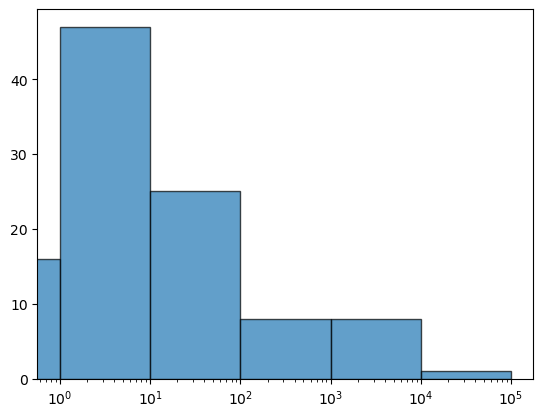

In [15]:
bins = np.hstack([0, 10**(np.arange(0,6))])
counts, bins, _ = plt.hist(stars_df.groupby("github_user_cleaned_url").count()["user"], bins=bins, ec="black", alpha=0.7)
plt.xscale('log')

In [16]:
print(counts)
print(bins)

[16. 47. 25.  8.  8.  1.]
[0.e+00 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [18]:
forks_df = pd.read_csv("../data/analysis/forks.csv", index_col=0)
forks_df.head()

,github_user_cleaned_url,date,user
0,JZhao12/CVML-Pose,NaN,NaN
1,CVML-UCLan/FCBFormer,NaN,NaN
2,eprintsug/loginViaOrcid,NaN,NaN
3,eprintsug/orcidt2,2015-06-04 11:49:59,wfyson
4,alphapsa/PIPE,2021-03-10 08:49:05,bmorris3


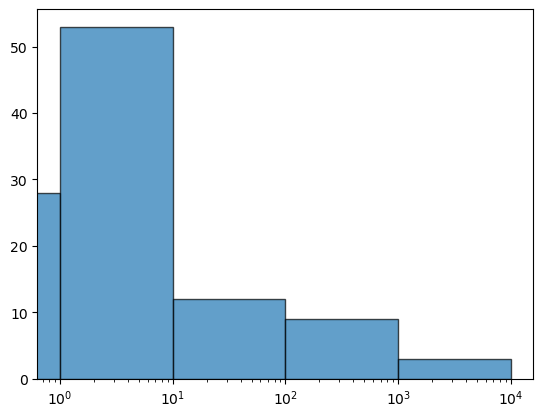

In [19]:
bins = np.hstack([0, 10**(np.arange(0,5))])
counts, bins, _ = plt.hist(forks_df.groupby("github_user_cleaned_url").count()["user"], bins = bins, ec="black", alpha=0.7)
plt.xscale('log')

In [24]:
fork_counts = forks_df.groupby("github_user_cleaned_url")["user"].count()
fork_counts.rename("forks_no", inplace=True)
star_counts = stars_df.groupby("github_user_cleaned_url")["user"].count()
star_counts.rename("stars_no", inplace=True)
engagement = pd.merge(left=fork_counts, right=star_counts, on="github_user_cleaned_url")
engagement.head()

,forks_no,stars_no
github_user_cleaned_url,,
52North/GEO-label-java,4,4
ADAC-UoN/PIMMS,1,0
AlexTS1980/COVID-Single-Shot-Model,0,3
AshwathyTR/IDN-Sum,1,1
BryanHunt/mongo-emf,7,38


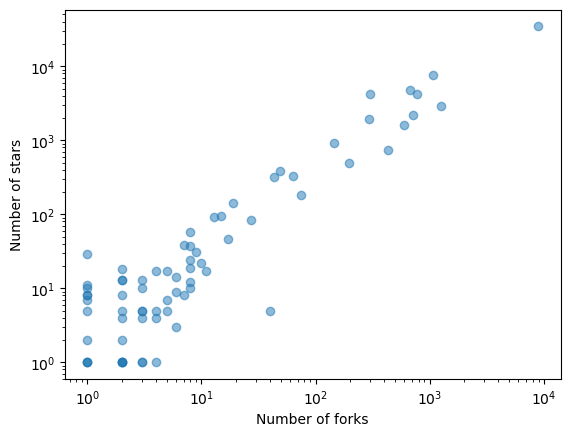

In [25]:
plt.scatter(engagement["forks_no"], engagement["stars_no"], alpha=0.5)
plt.xlabel("Number of forks")
plt.ylabel("Number of stars")
plt.xscale('log')
plt.yscale('log')

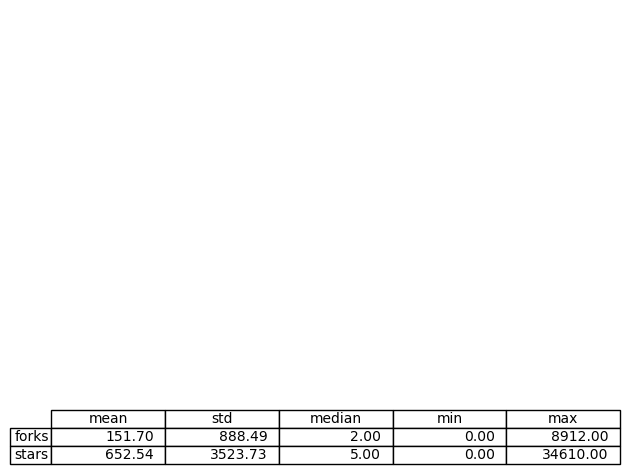

In [35]:
cell_text = [
    [f"{fork_counts.mean():.2f}", f"{fork_counts.std():.2f}", f"{fork_counts.median():.2f}", f"{fork_counts.min():.2f}", f"{fork_counts.max():.2f}"],
    [f"{star_counts.mean():.2f}", f"{star_counts.std():.2f}", f"{star_counts.median():.2f}", f"{star_counts.min():.2f}", f"{star_counts.max():.2f}"]
    ]
fig, ax = plt.subplots()

# hide axes
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = plt.table(cellText=cell_text,
                  rowLabels=["forks", "stars"],
                  colLabels=["mean", "std", "median", "min", "max"])

fig.tight_layout()

## Timelines

In [2]:
def plot_against_days_since_creation(df, column_name, label):
    """Plots number of markers set on all days since creation (total, one year, one month).

    Args:
        df (pd.DataFrame): input dataframe
        column_name (str): name of column with days since creation info
        label (str): what number we are looking at
    """
    counted = df.groupby(column_name).count()
    fig = plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.bar(counted.index, counted.github_user_cleaned_url)
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("Complete timeline across all repositories")

    plt.subplot(132)
    plt.bar(counted.index[:365], counted.github_user_cleaned_url[:365])
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("First year")

    plt.subplot(133)
    plt.bar(counted.index[:31], counted.github_user_cleaned_url[:31])
    plt.xlabel("days since repository creation")
    plt.ylabel(f"number of {label} on that day")
    plt.title("First month")

    plt.show()

In [61]:
def plot_against_weeks_since_creation(df, column_name, label):
    """Plots number of markers set on all days since creation (total, one year, one month).

    Args:
        df (pd.DataFrame): input dataframe
        column_name (str): name of column with days since creation info
        label (str): what number we are looking at
    """
    df[f"weekly_{column_name}"] = df[column_name]//7
    counted = df.groupby(f"weekly_{column_name}").count()
    fig = plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.bar(counted.index, counted.github_user_cleaned_url)
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("Complete timeline across all repositories")

    plt.subplot(132)
    plt.bar(counted.index[:52], counted.github_user_cleaned_url[:52])
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("First year")

    plt.subplot(133)
    plt.bar(counted.index[:4], counted.github_user_cleaned_url[:4])
    plt.xlabel("weeks since repository creation")
    plt.ylabel(f"number of label on that day")
    plt.title("First month")

    plt.show()

In [5]:
data_dir = "../data/analysis"

In [6]:
metadata = pd.read_csv(os.path.join(data_dir, "metadata.csv"), index_col=0)
metadata.created_at = pd.to_datetime(metadata.created_at, utc=True)
metadata.rename(columns={"created_at": "repo_created_at"}, inplace=True)
stars = pd.read_csv(os.path.join(data_dir, "stars.csv"), index_col=0)
stars.date = pd.to_datetime(stars.date, utc=True)

In [307]:
df = pd.merge(metadata, stars, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["starred_on_day_since_creation"] = (df.date - df.repo_created_at).dt.days

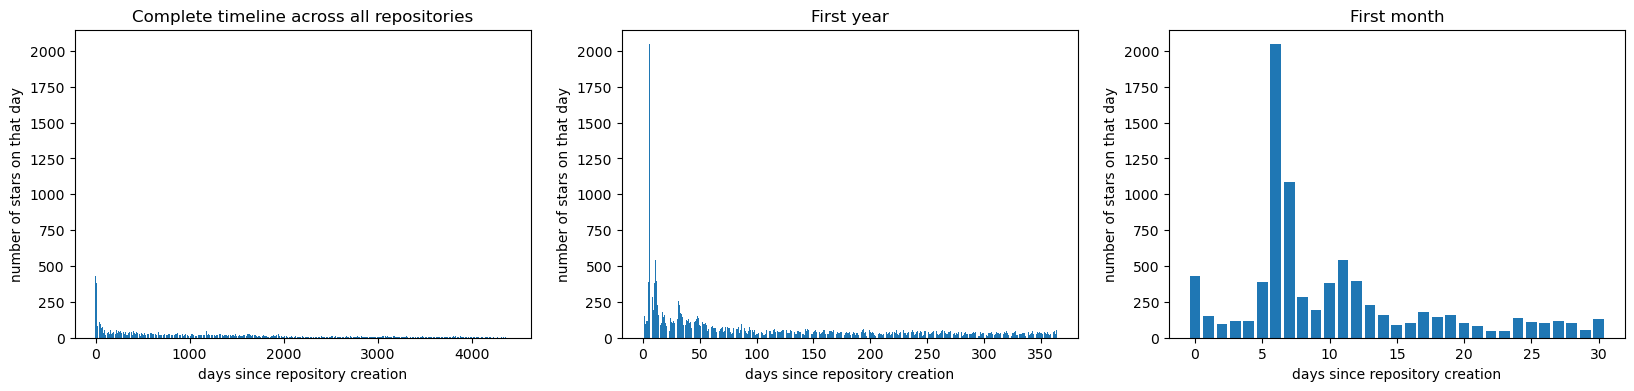

In [311]:
plot_against_days_since_creation(df, "starred_on_day_since_creation", "stars")

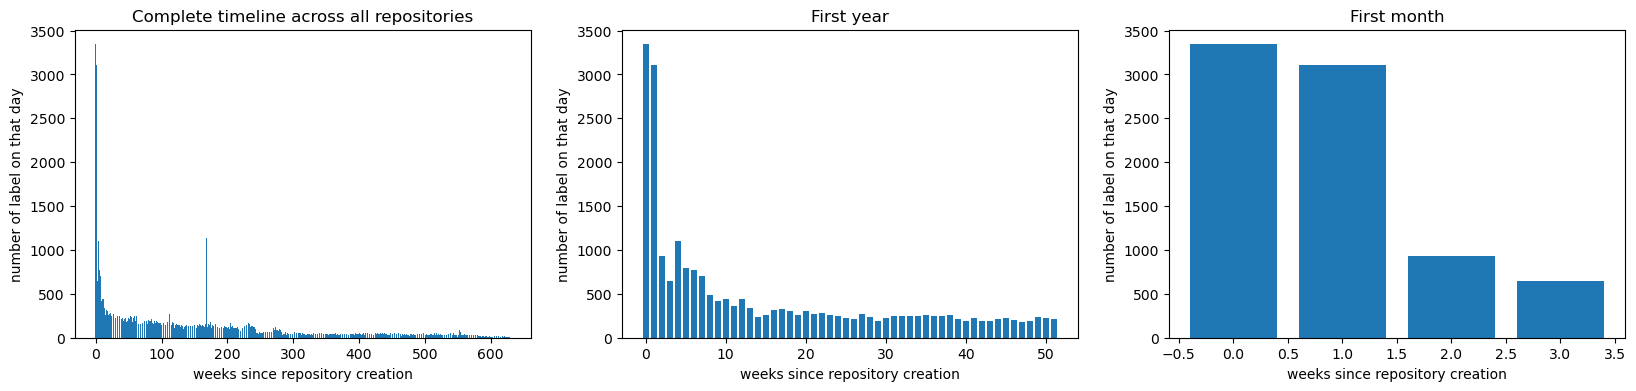

In [312]:
plot_against_weeks_since_creation(df, "starred_on_day_since_creation", "stars")

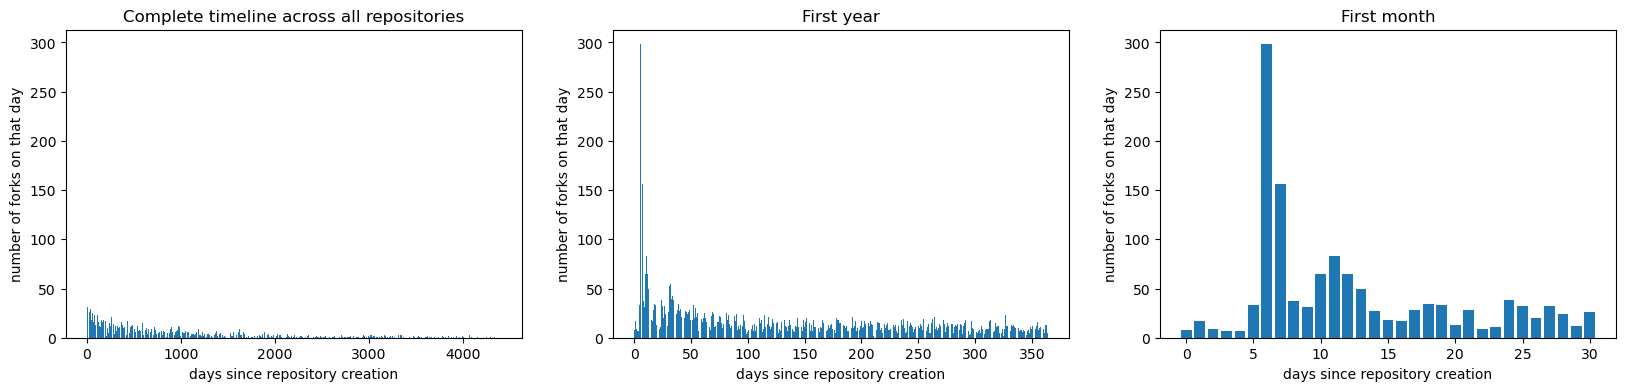

In [313]:
forks = pd.read_csv(os.path.join(data_dir, "forks.csv"), index_col=0)
forks.date = pd.to_datetime(forks.date, utc=True)
df = pd.merge(metadata, forks, on="github_user_cleaned_url")
df.dropna(subset=["date"], inplace=True)
df["forked_on_day_since_creation"] = (df.date - df.repo_created_at).dt.days
plot_against_days_since_creation(df, "forked_on_day_since_creation", "forks")

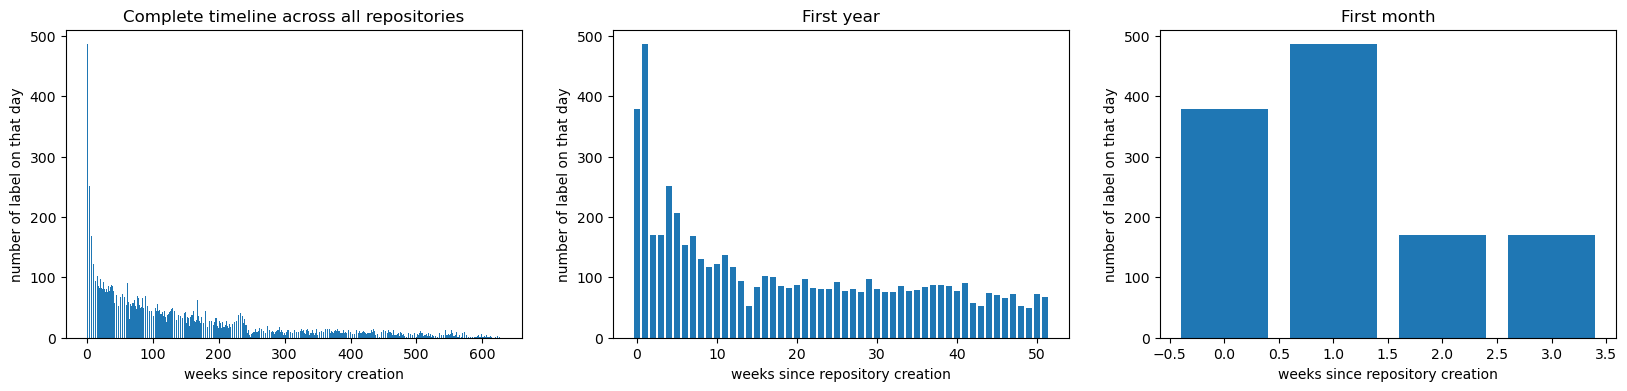

In [315]:
plot_against_weeks_since_creation(df, "forked_on_day_since_creation", "forks")

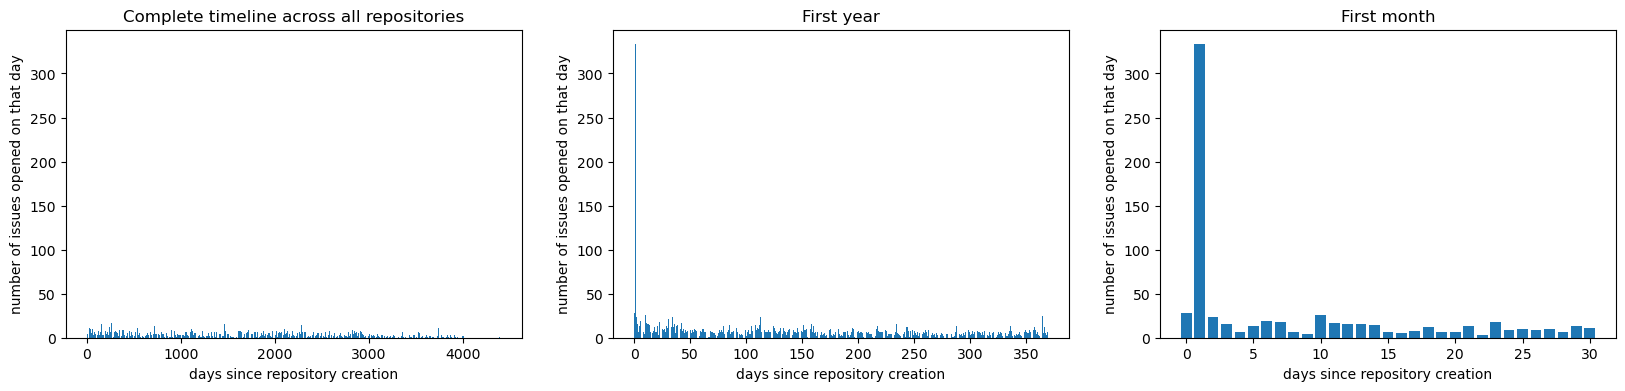

In [316]:
issues = pd.read_csv(os.path.join(data_dir, "issues.csv"), index_col=0)
issues.created_at = pd.to_datetime(issues.created_at, utc=True)
issues.closed_at = pd.to_datetime(issues.closed_at, utc=True)
df = pd.merge(metadata, issues, on="github_user_cleaned_url")
df.dropna(subset=["created_at"], inplace=True)
df["issue_opened_on_day_since_creation"] = (df.created_at - df.repo_created_at).dt.days
df = df[df.issue_opened_on_day_since_creation >= 0]
plot_against_days_since_creation(df, "issue_opened_on_day_since_creation", "issues opened")

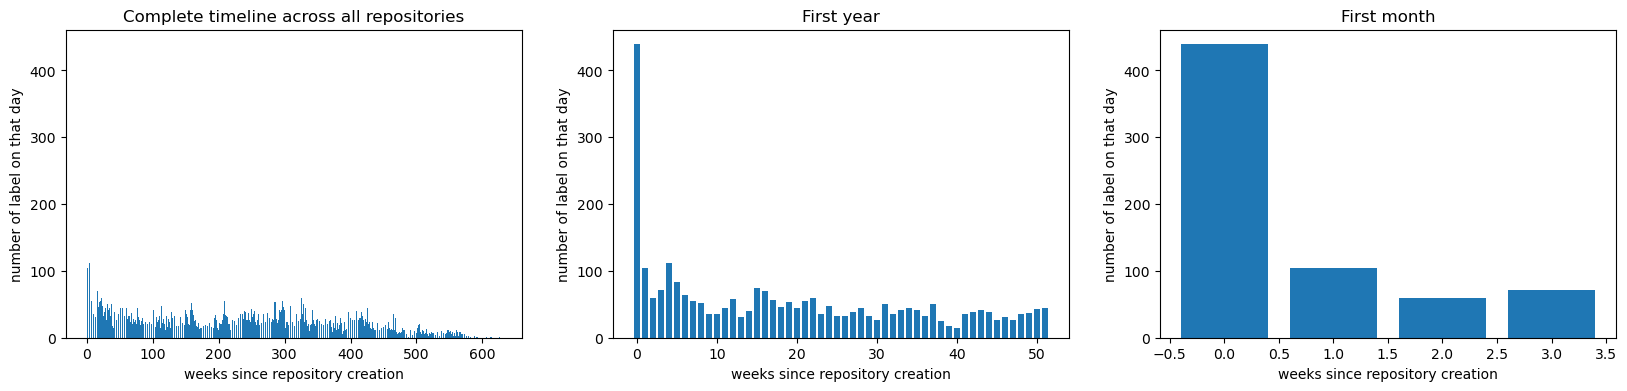

In [317]:
plot_against_weeks_since_creation(df, "issue_opened_on_day_since_creation", "issues opened")

## file presence

In [2]:
data_dir = "../data/analysis/"

In [3]:
contents = pd.read_csv(os.path.join(data_dir, "contents.csv"), index_col=0)
contents.head()

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added,contributing_added
0,JZhao12/CVML-Pose,apache-2.0,8539,README.md,0,0,NaN,NaN
1,CVML-UCLan/FCBFormer,NaN,541,README.md,0,0,NaN,NaN
2,eprintsug/loginViaOrcid,NaN,68,README.md,0,0,NaN,NaN
3,eprintsug/orcidt2,NaN,1157,README.md,0,0,NaN,NaN
4,alphapsa/PIPE,NaN,3182,README.rst,0,0,NaN,NaN


In [4]:
contents[pd.notna(contents.citation_added) == True]

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added,contributing_added
36,esbmc/esbmc,other,13239,README.md,0,0,2022-12-06 14:46:10+00:00,NaN


In [5]:
pd.notna(contents.contributing_added).value_counts()

False    98
True      5
Name: contributing_added, dtype: int64

In [7]:
contents.loc[pd.notna(contents.contributing_added)]

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added,contributing_added
45,r-barnes/dggridR,agpl-3.0,7128,README.md,0,1039,NaN,2021-10-31 11:43:04-06:00
71,mozilla/TTS,mpl-2.0,14293,README.md,15,1942,NaN,2019-07-17 17:24:40+02:00
75,DiUS/java-faker,other,3407,README.md,0,902,NaN,2019-07-20 12:35:12+10:00
91,google-research/bert,apache-2.0,50519,README.md,0,1323,NaN,2018-10-31 08:19:12-07:00
100,supercollider/supercollider,gpl-3.0,5619,README.md,0,117,NaN,2017-06-27 14:42:42-04:00


In [6]:
contents[contents.readme_emojis > 0]

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added,contributing_added
30,nilmtk/nilmtk,apache-2.0,5444,README.md,1,0,NaN,NaN
56,xiongbo010/QGCN,mit,5189,README.md,1,0,NaN,NaN
71,mozilla/TTS,mpl-2.0,14293,README.md,15,1942,NaN,2019-07-17 17:24:40+02:00
82,bernuly/VCSimulinkTlbx,NaN,1612,README.md,1,0,NaN,NaN
84,kennethreitz/grequests,bsd-2-clause,4078,README.rst,3,0,NaN,NaN
98,ieee8023/covid-chestxray-dataset,NaN,10616,README.md,2,0,NaN,NaN


In [8]:
contents_df = pd.merge(metadata, contents, on="github_user_cleaned_url")
contents_df["citation_added"] = pd.to_datetime(contents_df.citation_added, utc=True)
contents_df["citation_added"] = (contents_df.citation_added - contents_df.created_at).dt.days // 7

NameError: name 'metadata' is not defined

In [9]:
contents_df

NameError: name 'contents_df' is not defined

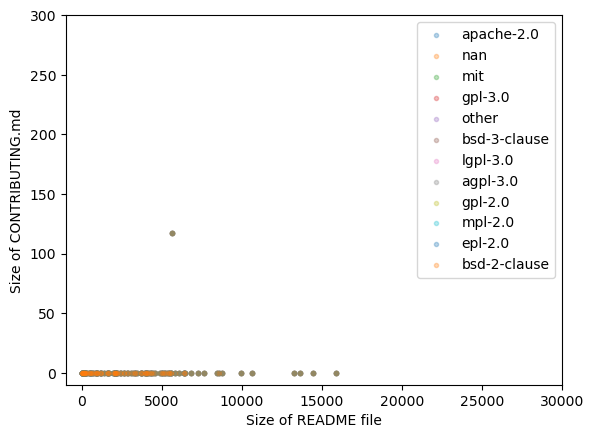

In [37]:
for l in contents.license.unique():
    tmp = contents[contents.license == l]
    plt.scatter(contents.readme_size, contents.contributing_size, alpha=0.3, marker='.', label=l)
plt.xlabel("Size of README file")
plt.ylabel("Size of CONTRIBUTING.md")
plt.xlim(-1000, 30000)
plt.ylim(-10, 300)
plt.legend()
plt.show()

<Axes: >

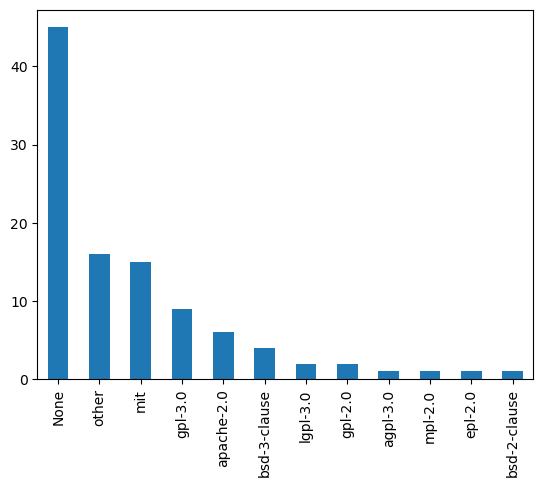

In [13]:
contents.license = contents.license.fillna('None')
contents.license.value_counts().plot(kind='bar')

In [38]:
permissive_licenses = ["mit", "gpl-3.0", "apache-2.0", "bsd-3-clause", "gpl-2.0", "bsd-2-clause"] # https://en.wikipedia.org/wiki/Permissive_software_license

In [43]:
contents.license = contents.license.fillna('None')
contents["license_type"] = np.where(contents.license.isin(permissive_licenses), "permissive", np.where(contents.license == "None", "None", np.where(contents.license == "other", "unknown", "non-permissive")))

<Axes: >

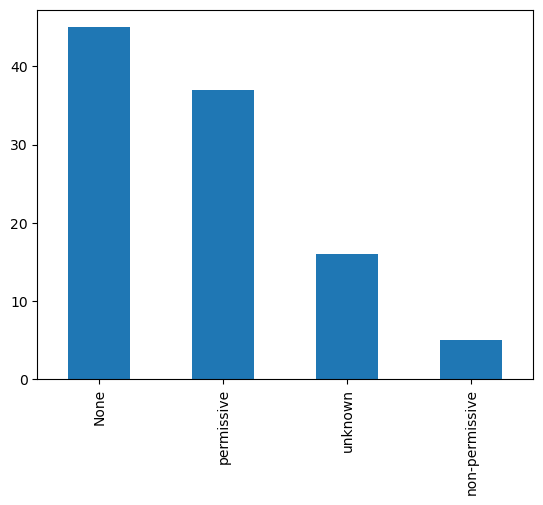

In [44]:
contents.license_type.value_counts().plot(kind='bar')

In [11]:
contents.github_user_cleaned_url[contents.license == "other"]

16                       epsilonlabs/emf-cbp
17          s-goldman/Dusty-Evolved-Star-Kit
26                          rii-mango/Papaya
27             tstafylakis/Lipreading-ResNet
31               TGMclustering/TGMclustering
32             PRiME-project/PRiME-Framework
36                               esbmc/esbmc
42        UoS-EEC/INET-opportunistic-routing
43     stuartemiddleton/glosat_table_dataset
48                 facebookresearch/SentEval
49               sebastianarnold/WikiSection
52                        AshwathyTR/IDN-Sum
61                          introlab/rtabmap
75                           DiUS/java-faker
78                           atlanmod/NeoEMF
111                        morriscb/The-wiZZ
Name: github_user_cleaned_url, dtype: object

In [12]:
contents.github_user_cleaned_url[contents.license == "bsd-3-clause"]

24                     cs-chan/Deep-Plant
33                   fchirono/amiet_tools
55    WalterZWang/AlphaBuilding-MedOffice
59                    uos/mesh_navigation
Name: github_user_cleaned_url, dtype: object

<Axes: xlabel='license', ylabel='readme_size'>

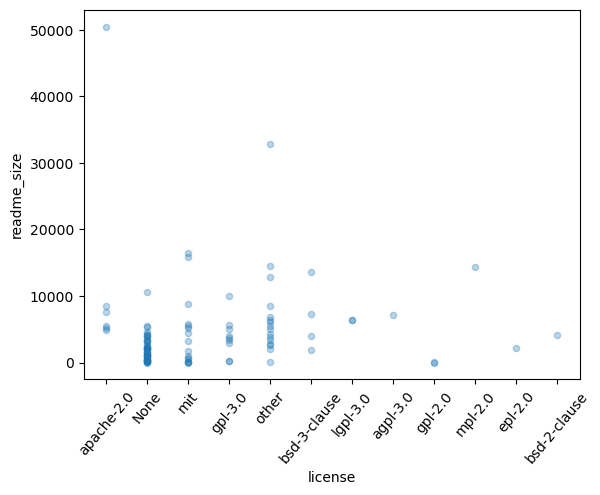

In [74]:
contents.license = contents.license.fillna('None')
contents.plot(x="license", y="readme_size", kind="scatter", alpha=0.3, rot=50)

### README size

In [67]:
readme_size_series = contents.set_index("github_user_cleaned_url").readme_size

[Text(0.5, 0, 'size of README in Bytes'), Text(0, 0.5, 'repository count')]

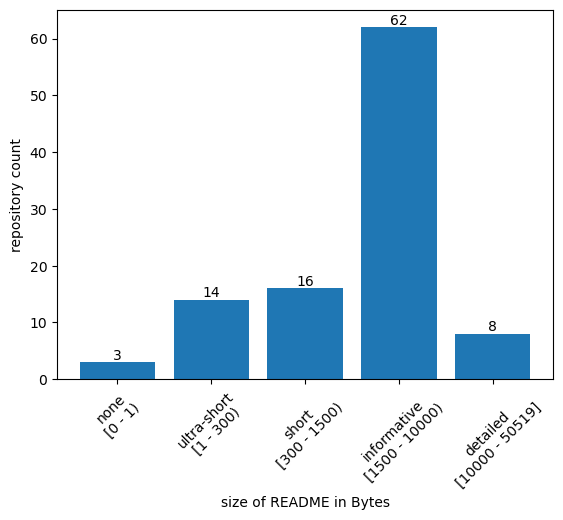

In [70]:
bins = [0, 1, 300, 1500, 10000]
binmeanings = ["none", "ultra-short", "short", "informative", "detailed"]
if readme_size_series.max() > bins[-1]:
    bins.append(readme_size_series.max())
counts, bins = np.histogram(readme_size_series, bins)
binlabels = [f"{binmeanings[i]}\n[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
binlabels += [f"{binmeanings[-1]}\n[{bins[-2]} - {bins[-1]}]"]
fig, ax = plt.subplots(ncols=1, nrows=1)#, figsize=(18, 12))
ax.bar(binlabels, counts)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=45)
ax.set(xlabel="size of README in Bytes", ylabel="repository count")

([<matplotlib.patches.Wedge at 0x7fc78fa9fd90>,
 [Text(1.095398202941615, 0.10051257131464043, 'none\n[0 - 1)'),
  Text(0.9016014861821131, 0.6301704214847005, 'ultra-short\n[1 - 300)'),
  Text(0.05030893909224131, 1.0988489480576542, 'short\n[300 - 1500)'),
  Text(-0.7954054644284912, -0.7598224444943019, 'informative\n[1500 - 10000)'),
  Text(1.067415450763648, -0.2657522445268119, 'detailed\n[10000 - 50519]')])

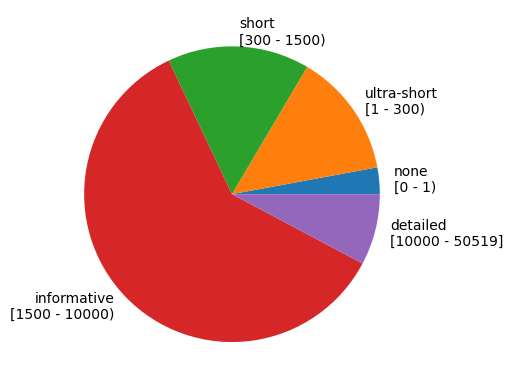

In [72]:
bins = [0, 1, 300, 1500, 10000]
binmeanings = ["none", "ultra-short", "short", "informative", "detailed"]
if readme_size_series.max() > bins[-1]:
    bins.append(readme_size_series.max())
counts, bins = np.histogram(readme_size_series, bins)
binlabels = [f"{binmeanings[i]}\n[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
binlabels += [f"{binmeanings[-1]}\n[{bins[-2]} - {bins[-1]}]"]
fig, ax = plt.subplots(ncols=1, nrows=1)#, figsize=(18, 12))
ax.pie(counts, labels=binlabels)
#ax.bar(binlabels, counts)
#ax.bar_label(ax.containers[0])
#ax.tick_params(axis='x', labelrotation=45)
#ax.set(xlabel="size of README in Bytes", ylabel="repository count")

In [65]:
bins = [0, 1, 300, 1500, 10000]
if readme_size_series.max() > bins[-1]:
    bins.append(readme_size_series.max())
lower = bins[0]
for upper in bins[1:]:
    tmp = readme_size_series[readme_size_series.between(lower, upper)]
    tmp = tmp.sort_values()
    samples_low = tmp.iloc[:3]
    samples_high = tmp.iloc[-3:]
    print((lower, upper))
    print("lower:")
    print(samples_low)
    print("higher:")
    print(samples_high)
    print()
    lower = upper


(0, 1)
lower:
github_user_cleaned_url
xgfd/ASPG                        0
eghbal11/Eghbal                  0
supercollider-quarks/Republic    0
Name: readme_size, dtype: int64
higher:
github_user_cleaned_url
xgfd/ASPG                        0
eghbal11/Eghbal                  0
supercollider-quarks/Republic    0
Name: readme_size, dtype: int64

(1, 300)
lower:
github_user_cleaned_url
NeuroanatomyAndConnectivity/broca    25
epsilonlabs/emf-cbp                  39
andrewtarzia/cage_datasets           46
Name: readme_size, dtype: int64
higher:
github_user_cleaned_url
gamesbyangelina/danesh                     188
brunomozza/IoTSecurityOntology             209
NeuroanatomyAndConnectivity/nki_nilearn    256
Name: readme_size, dtype: int64

(300, 1500)
lower:
github_user_cleaned_url
lphowell/Geothermal-Modelling    331
mhinsch/RRGraphs_mini            452
muellmusik/Utopia                524
Name: readme_size, dtype: int64
higher:
github_user_cleaned_url
yoqim/TBLD                    1191
orei

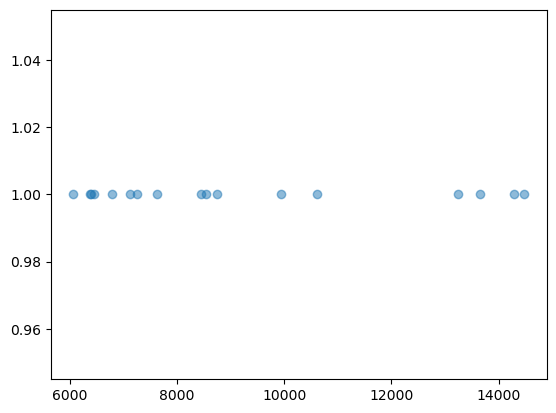

In [62]:
series = readme_size_series[readme_size_series.between(6000, 15000)]
plt.scatter(x=series, y=[1]*len(series), alpha=0.5)

### connect with engagement numbers

In [46]:
forks = pd.read_csv(os.path.join(data_dir, "forks.csv"))

In [49]:
forks_count = forks.groupby("github_user_cleaned_url").date.count().rename("no_forks")

In [51]:
df = pd.merge(contents, forks_count, left_on="github_user_cleaned_url", right_index=True)

<Axes: xlabel='license_type', ylabel='no_forks'>

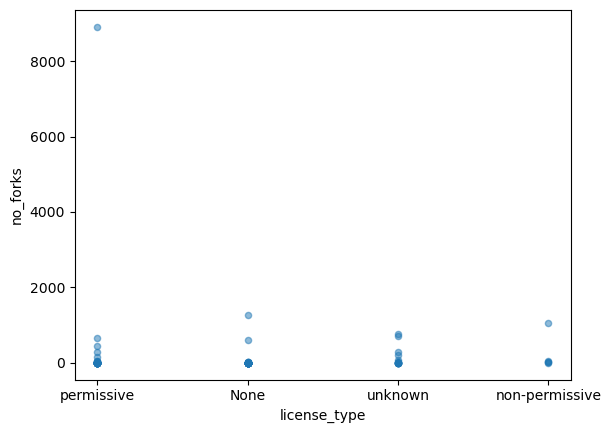

In [55]:
df.plot(
    kind="scatter",
    x="license_type",
    y="no_forks",
    alpha=0.5
)

## Team size


In [4]:
metadata = pd.read_csv(os.path.join(data_dir, "metadata.csv"), index_col=0)
metadata["created_at"] = pd.to_datetime(metadata.created_at)
contributions = pd.read_csv(os.path.join(data_dir, "contributions.csv"), index_col=0)
contributions["week_co"] = pd.to_datetime(contributions.week_co)

In [5]:
contrib_df = pd.merge(metadata[["github_user_cleaned_url", "created_at"]], contributions)
contrib_df["week_since_repo_creation"] = (contrib_df.week_co - contrib_df.created_at).dt.days // 7
team_df = contrib_df[["github_user_cleaned_url", "author", "week_since_repo_creation", "commits"]].set_index(["github_user_cleaned_url", "author", "week_since_repo_creation"]).sort_index()
# user is active contributor if made at least one commit in last 12 weeks
windowed_team_df = team_df.groupby(level="author").rolling(window=12, min_periods=0).sum().droplevel(0)
windowed_team_df["active contributors"] = windowed_team_df.commits > 0
# team size
team_size = windowed_team_df.groupby(level=["github_user_cleaned_url", "week_since_repo_creation"])["active contributors"].value_counts()[:,:,True]
max_team_size = team_size.groupby(level="github_user_cleaned_url").max()
max_team_size

github_user_cleaned_url
52North/GEO-label-java                2
AlexTS1980/COVID-Single-Shot-Model    1
AshwathyTR/IDN-Sum                    1
BryanHunt/mongo-emf                   1
CVML-UCLan/FCBFormer                  1
                                     ..
xgfd/ASPG                             1
xiongbo010/QGCN                       1
yoqim/TBLD                            1
zdai257/DeepAoANet                    1
ziqizhang/sti                         1
Name: active contributors, Length: 104, dtype: int64

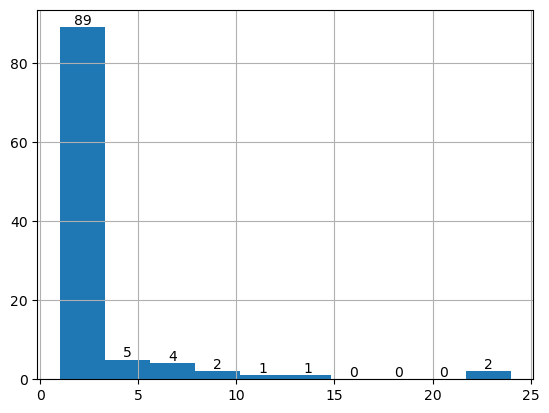

In [6]:
ax = max_team_size.hist()
ax.bar_label(ax.containers[0])
plt.show()

### team size vs license

In [9]:
contents = pd.read_csv(os.path.join(data_dir, "contents.csv"), index_col=0)
permissive_licenses = ["mit", "gpl-3.0", "apache-2.0", "bsd-3-clause", "gpl-2.0", "bsd-2-clause"] # https://en.wikipedia.org/wiki/Permissive_software_license
contents.license = contents.license.fillna('None')
contents["license_type"] = np.where(
    contents.license.isin(permissive_licenses), "permissive", np.where(
    contents.license == "None", "None", np.where(
    contents.license == "other", "unknown", "non-permissive")))

In [68]:
df = pd.merge(max_team_size, contents[["github_user_cleaned_url", "license_type", "license"]], left_index=True, right_on="github_user_cleaned_url")

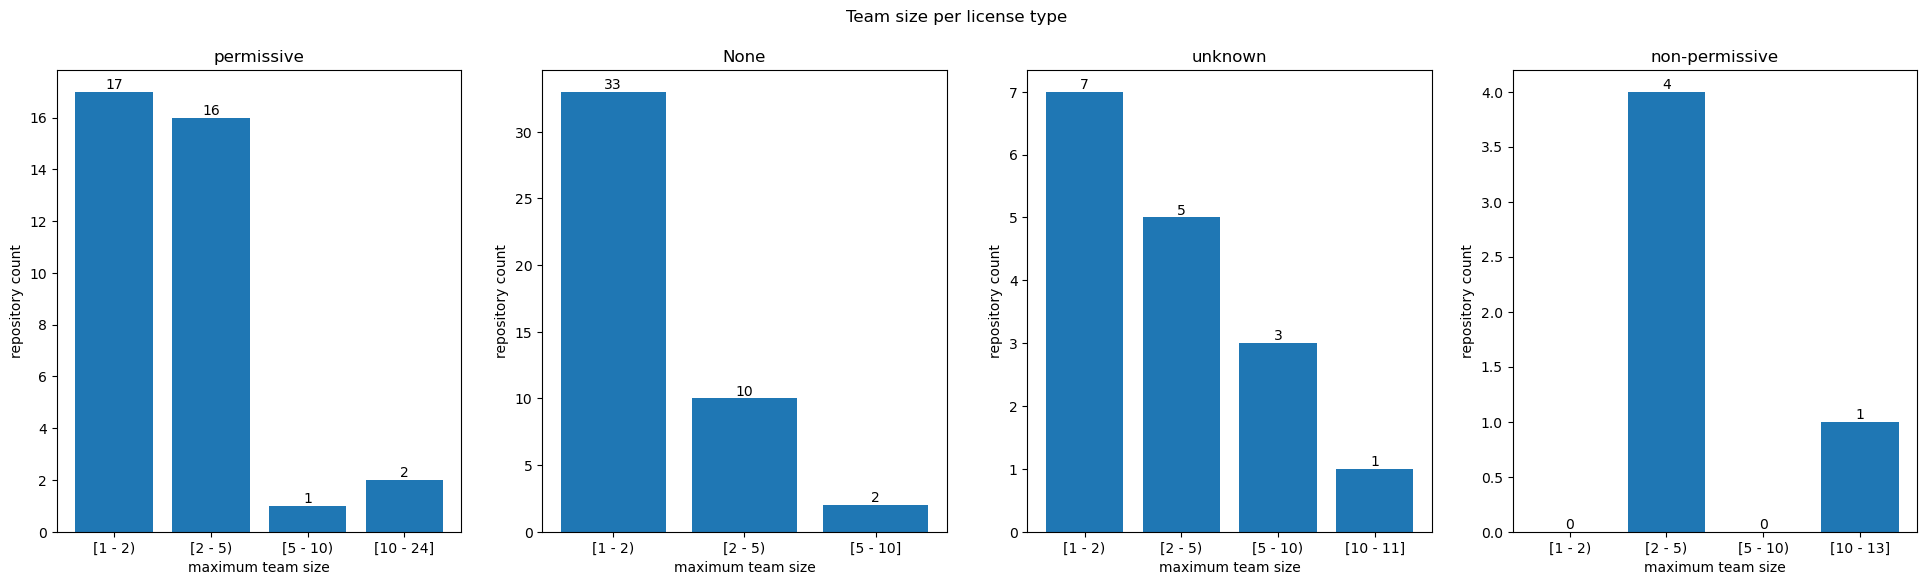

In [69]:
n = len(df.license_type.unique())
fig, axs = plt.subplots(ncols=n, nrows=1, figsize=(6*n, 6))
for i, lt in enumerate(df.license_type.unique()):
    ax = axs[i]
    bins = [1, 2, 5, 10]
    tmp = df[df["license_type"] == lt]
    if tmp["active contributors"].max() > bins[-1]:
        bins.append(tmp["active contributors"].max())
    counts, bins = np.histogram(tmp["active contributors"], bins)
    binlabels = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
    binlabels += [f"[{bins[-2]} - {bins[-1]}]"]
    ax.bar(binlabels, counts)
    ax.bar_label(ax.containers[0])
    ax.set(xlabel="maximum team size", ylabel="repository count", title=lt)
plt.suptitle("Team size per license type")
plt.show()

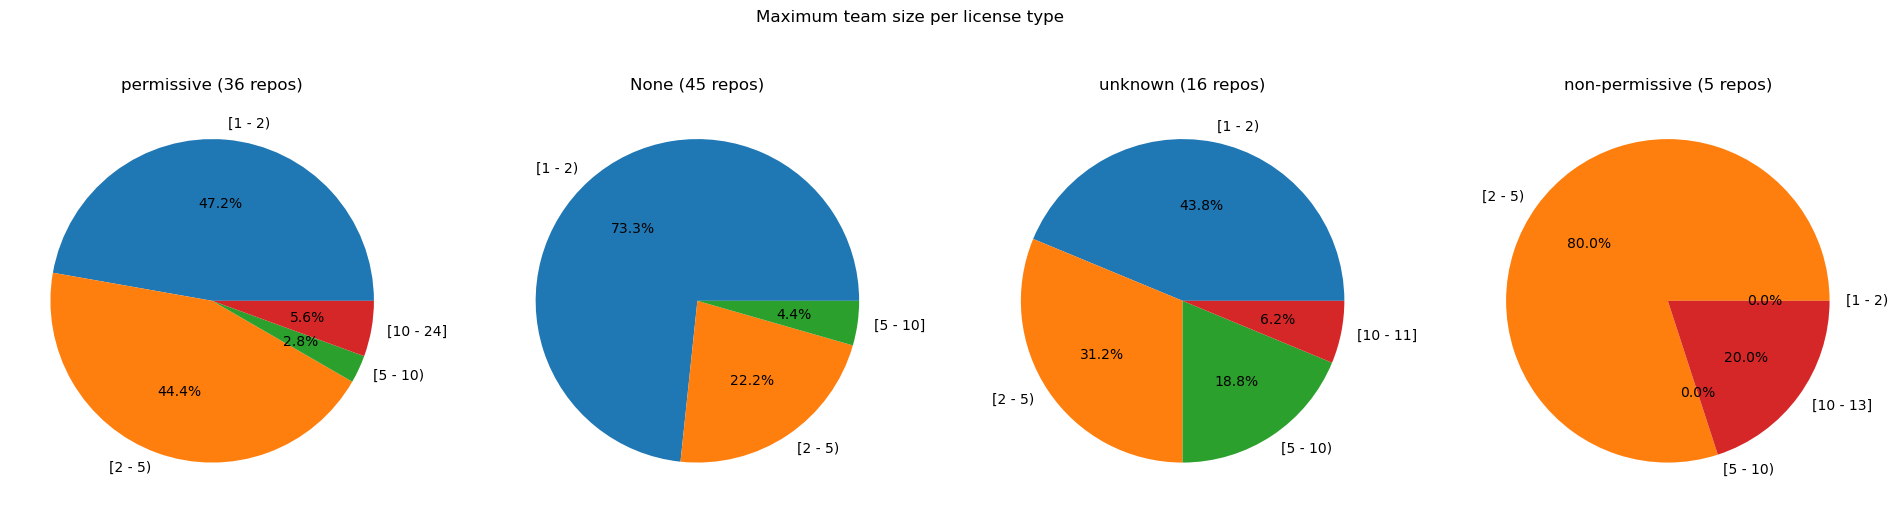

In [77]:
n = len(df.license_type.unique())
fig, axs = plt.subplots(ncols=n, nrows=1, figsize=(6*n, 6))
for i, lt in enumerate(df.license_type.unique()):
    ax = axs[i]
    bins = [1, 2, 5, 10]
    tmp = df[df["license_type"] == lt]
    if tmp["active contributors"].max() > bins[-1]:
        bins.append(tmp["active contributors"].max())
    counts, bins = np.histogram(tmp["active contributors"], bins)
    binlabels = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
    binlabels += [f"[{bins[-2]} - {bins[-1]}]"]
    ax.pie(x=counts, labels=binlabels, autopct='%1.1f%%')
    #ax.bar_label(ax.containers[0])
    #ax.set(xlabel="maximum team size", ylabel="repository count", title=lt)
    ax.set(title=f"{lt} ({len(tmp)} repos)")
plt.suptitle("Maximum team size per license type")
plt.savefig("../data/analysis/overall/team_size_per_license_type.png")
plt.show()

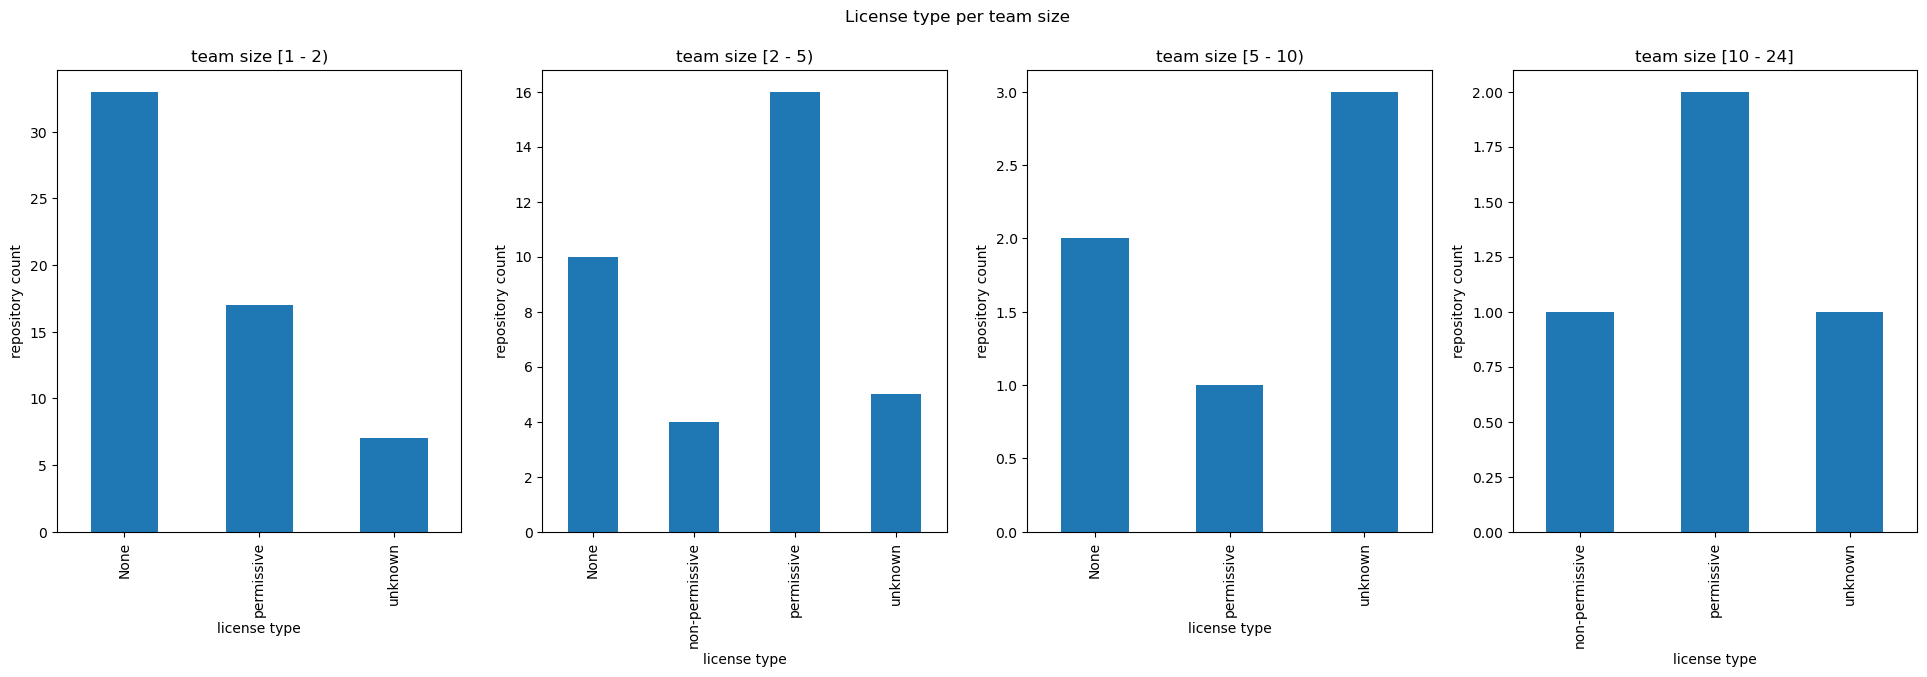

In [71]:
bins = [0, 1, 2, 5, 10]
if df["active contributors"].max() > bins[-1]:
    bins.append(df["active contributors"].max())
counts, bins = np.histogram(df["active contributors"], bins)
binlabels = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
binlabels += [f"[{bins[-2]} - {bins[-1]}]"]

n = len(bins)-2
fig, axs = plt.subplots(ncols=n, nrows=1, figsize=(6*n, 6))
lower=bins[1]
# iterate
for i, upper in enumerate(bins[2:-1]):
    ax = axs[i]
    tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] < upper)]
    tmp.license_type.value_counts().sort_index().plot(
        kind='bar',
        ax=ax,
        xlabel="license type",
        ylabel="repository count",
        title="team size "+binlabels[1+i]
    )
    lower = upper
# add last with inclusive upper limit
ax = axs[-1]
upper = bins[-1]
tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] <= upper)]
tmp.license_type.value_counts().sort_index().plot(
    kind='bar',
    ax=ax,
    xlabel="license type",
    ylabel="repository count",
    title="team size "+binlabels[-1]
)
plt.suptitle("License type per team size")
plt.show()

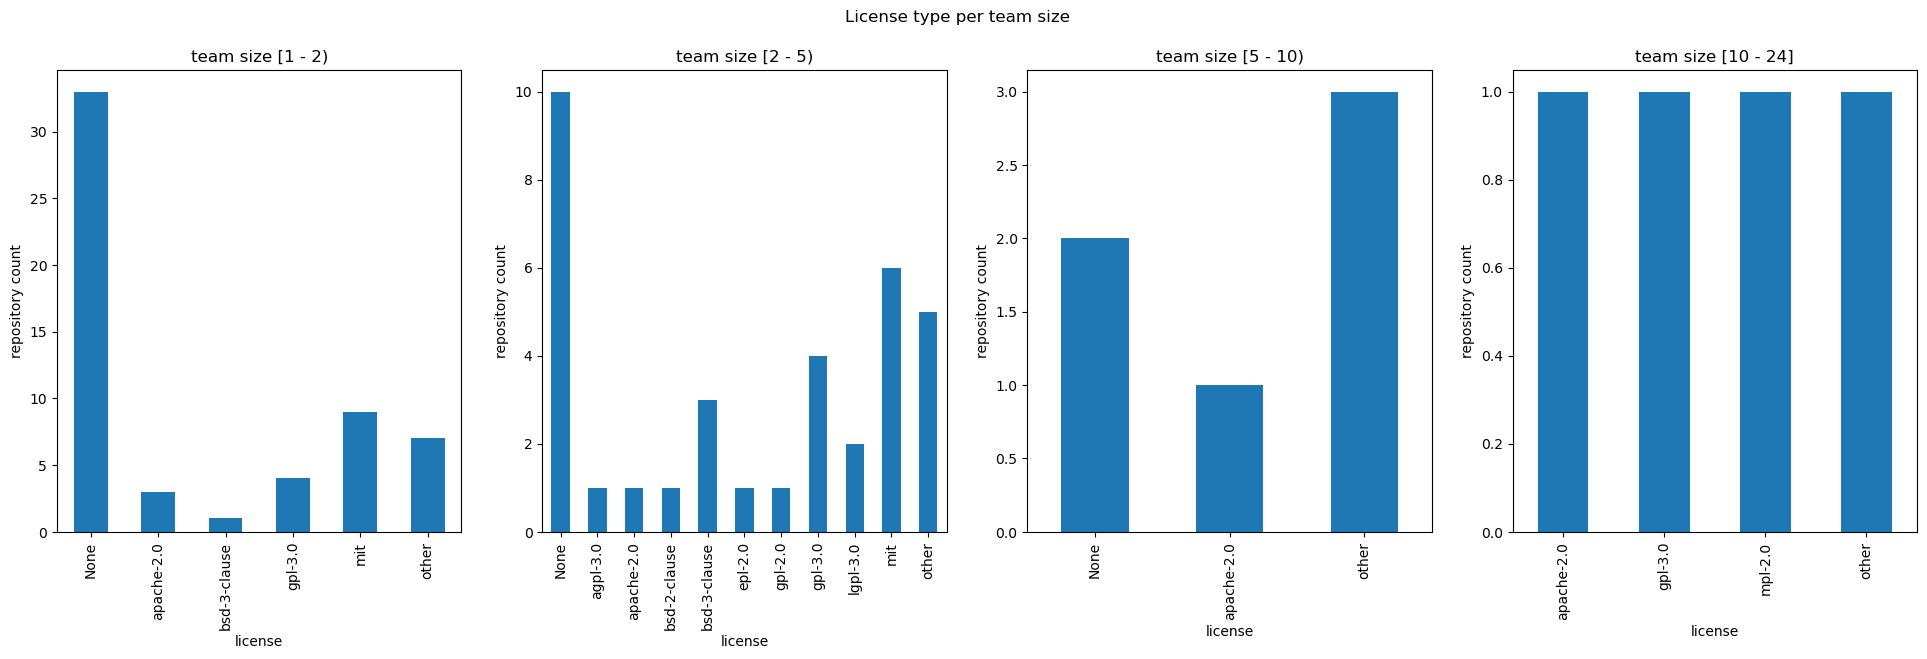

In [72]:
bins = [0, 1, 2, 5, 10]
if df["active contributors"].max() > bins[-1]:
    bins.append(df["active contributors"].max())
counts, bins = np.histogram(df["active contributors"], bins)
binlabels = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
binlabels += [f"[{bins[-2]} - {bins[-1]}]"]

n = len(bins)-2
fig, axs = plt.subplots(ncols=n, nrows=1, figsize=(6*n, 6))
lower=bins[1]
# iterate
for i, upper in enumerate(bins[2:-1]):
    ax = axs[i]
    tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] < upper)]
    tmp.license.value_counts().sort_index().plot(
        kind='bar',
        ax=ax,
        xlabel="license",
        ylabel="repository count",
        title="team size "+binlabels[1+i]
    )
    lower = upper
# add last with inclusive upper limit
ax = axs[-1]
upper = bins[-1]
tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] <= upper)]
tmp.license.value_counts().sort_index().plot(
    kind='bar',
    ax=ax,
    xlabel="license",
    ylabel="repository count",
    title="team size "+binlabels[-1]
)
plt.suptitle("License type per team size")
plt.show()

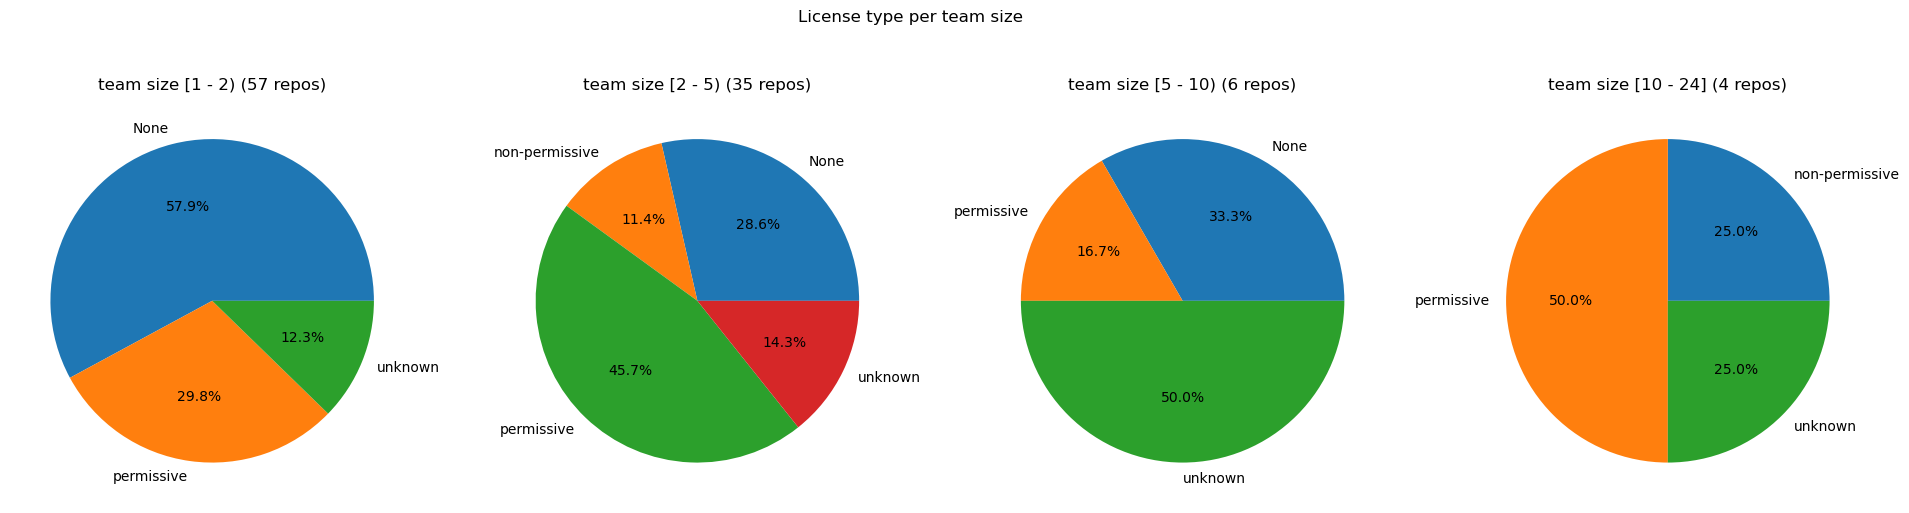

In [78]:
bins = [0, 1, 2, 5, 10]
if df["active contributors"].max() > bins[-1]:
    bins.append(df["active contributors"].max())
counts, bins = np.histogram(df["active contributors"], bins)
binlabels = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(bins)-2)]
binlabels += [f"[{bins[-2]} - {bins[-1]}]"]

n = len(bins)-2
fig, axs = plt.subplots(ncols=n, nrows=1, figsize=(6*n, 6))
lower=bins[1]
# iterate
for i, upper in enumerate(bins[2:-1]):
    ax = axs[i]
    tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] < upper)]
    tmp.license_type.value_counts().sort_index().plot(
        kind='pie',
        ax=ax,
        #xlabel="license type",
        ylabel="",
        title=f"team size {binlabels[1+i]} ({len(tmp)} repos)",
        autopct='%1.1f%%'
    )
    lower = upper
# add last with inclusive upper limit
ax = axs[-1]
upper = bins[-1]
tmp = df[(df["active contributors"] >= lower) & (df["active contributors"] <= upper)]
tmp.license_type.value_counts().sort_index().plot(
    kind='pie',
    ax=ax,
    #xlabel="license type",
    ylabel="",
    title=f"team size {binlabels[-1]} ({len(tmp)} repos)",
    autopct='%1.1f%%'
)
plt.suptitle("License type per team size")
plt.savefig("../data/analysis/overall/license_type_per_team_size.png")
plt.show()

## README headlines

In [150]:
readme_df = pd.read_csv(os.path.join(data_dir, "readme_history.csv"), index_col=0)
readme_df.head()

,github_user_cleaned_url,readme_path,author_date,added_headings,deleted_headings,added_cites
0,JZhao12/CVML-Pose,README.md,2023-02-10 01:03:13+00:00,['CVML-Pose'],[],[]
0,JZhao12/CVML-Pose,README.md,2023-02-10 01:06:21+00:00,['CVML-Pose: Convolutional VAE based Multi-Lev...,['CVML-Pose'],[]
0,JZhao12/CVML-Pose,README.md,2023-02-10 01:43:59+00:00,['1.1 Download data'],['1.1 Data'],[]
0,JZhao12/CVML-Pose,README.md,2023-02-16 16:50:41+00:00,"['3. Commercial use', '4. Acknowledgements', '...","['3. Citation', '4. Commercial use', '5. Ackno...",[]
0,JZhao12/CVML-Pose,README.md,2023-04-17 01:08:40+01:00,[],[],"['@article{zhao2023cvml,']"


In [94]:
readme_df[readme_df.added_headings.str.contains("Neo4J 2.0.1", na=False)]

,github_user_cleaned_url,readme_path,author_date,added_headings,deleted_headings,added_cites
71,mondo-project/mondo-hawk,README.md,2015-07-01 14:53:20+01:00,['Clone this Git repository on your Eclipse in...,[],[]


In [164]:
import re
import ast

pattern = "\[(.+?)\]\(.+?\)"
text = 'COVID-19 image data collection ([🎬 video about the project](https://www.youtube.com/watch?v=ineWmqfelEQ))'
re.sub(pattern, r'\1', text, count=0)

'COVID-19 image data collection (🎬 video about the project)'

In [218]:
import string
import re

def clean_heading(h):
    to_remove = string.digits + string.whitespace + ".:"
    h = h.lstrip(to_remove)
    pattern = "\[(.+?)\]\(.+?\)"
    h = re.sub(pattern, r'\1', h, count=0)
    h = h.replace(string.punctuation, "")
    h = h.strip(string.punctuation)
    h = h.lower()
    return h
    

In [219]:
import ast

headings = []
for l in readme_df.added_headings.dropna():
    headings += ast.literal_eval(l)
headings = [clean_heading(h) for h in headings]

In [158]:
readme_df.added_cites[(readme_df.added_cites != "[]") & (readme_df.added_cites.notna())]

0                             ['@article{zhao2023cvml,']
13     ['<pre>@article{Goldman2020,', '  url = {https...
18     ['function based on the [Higham’s 1988 paper](...
20                               ['@article{lee2017PR,']
20                                ['@article{Lee20171,']
25     ['Batra, N., Kelly, J., Parson, O., Dutta, H.,...
25     ['The first ACM Workshop On Embedded Systems F...
25     ['* Batra, N., Kelly, J., Parson, O., Dutta, H...
25     ['1. Nipun Batra, Jack Kelly, Oliver Parson, H...
28     ['* Hans Fangohr, *Python for Computational Sc...
28     ['* Casagrande Hirono,F., Joseph, P., Fazi, F....
31     ['* Mikhail Y. R. Gadelha, Felipe R. Monteiro,...
31     ['* Phillipe A. Pereira, Higo F. Albuquerque, ...
31     ['* Lucas C. Cordeiro, Bernd Fischer, João Mar...
31     ['* Lucas C. Cordeiro, Bernd Fischer. [Verifyi...
31     ['* Felipe R. Monteiro, Mikhail R. Gadelha, Lu...
31     ['* Felipe R. Monteiro, Mikhail R. Gadelha, Lu...
31     ['* Felipe R. Monteiro, 

### word cloud

In [232]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = STOPWORDS
custom = set(["trades", "glosat", "glosat_table_dataset", "nilmtk", "bert", "lemon", "cascadetabnet"])
stopwords = stopwords.union(custom)

In [248]:
wordcloud = WordCloud(
    collocation_threshold=15,
    stopwords=stopwords,
    scale=10,
    background_color="white",
    random_state=42
    ).generate(" ".join(headings))

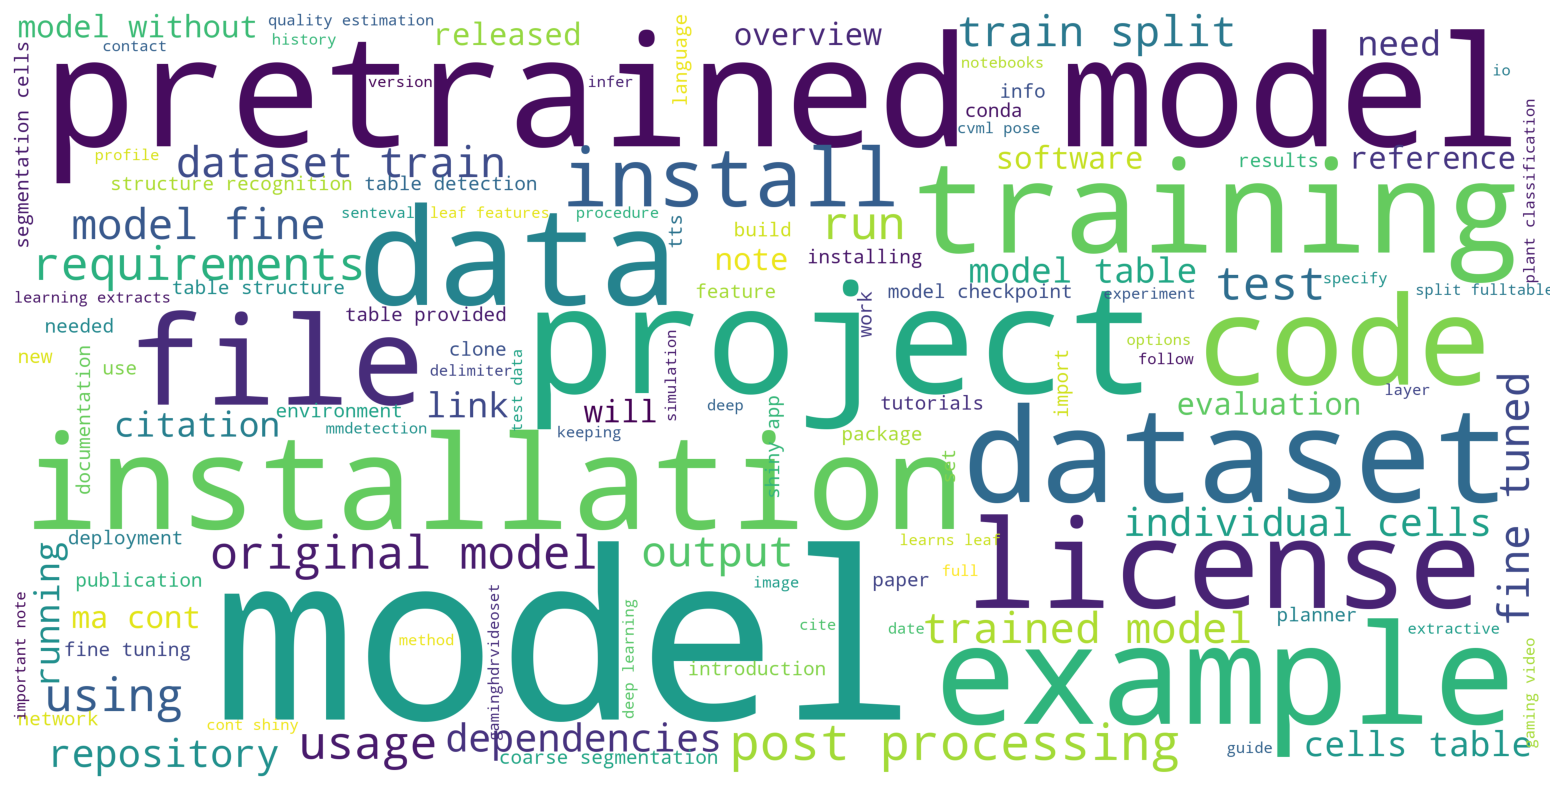

In [249]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### timelines

In [271]:
def analyse_headings(df):
    interesting_words = {
        "ownership": ["license", "example", "reference", "citation", "cited", "publication", "paper"],
        "usage": ["requirements", "using", "example", "usage", "run", "install", "installing", "installation", "tutorial", "tutorials", "build", "guide", "documentation"]
    }
    df["ownership_addition"] = df.added_headings.str.contains("|".join(interesting_words["ownership"]))
    df["usage_addition"] = df.added_headings.str.contains("|".join(interesting_words["usage"]))
    return df

In [272]:
readme_df.author_date = pd.to_datetime(readme_df.author_date, utc=True)
df = pd.merge(metadata, readme_df, on="github_user_cleaned_url")
df.dropna(subset=["author_date"], inplace=True)
df["authored_on_day_since_creation"] = (df.author_date - df.repo_created_at).dt.days

In [273]:
df = analyse_headings(df)

In [274]:
df[df["ownership_addition"] | df["usage_addition"]].head()

,github_user_cleaned_url,archived,repo_created_at,has_wiki,has_pages,readme_path,author_date,added_headings,deleted_headings,added_cites,authored_on_day_since_creation,ownership_addition,usage_addition
14,jlillo/tpfplotter,False,2020-02-02 21:31:02+00:00,True,False,README.md,2020-02-02 21:30:55+00:00,"['Purpose', 'Installation & Requirenments', 'U...",[],[],-1,False,True
24,survival-lumc/ValidationCompRisks,False,2021-02-17 09:12:11+00:00,True,False,README.md,2021-03-04 13:13:53+00:00,['External validation of the performance of co...,[],[],15,False,True
26,survival-lumc/ValidationCompRisks,False,2021-02-17 09:12:11+00:00,True,False,README.md,2021-11-02 07:27:06+00:00,['Validation of prediction models in presence ...,['External validation of the performance of co...,[],257,False,True
27,lucaborsato/trades,False,2014-07-10 12:23:27+00:00,True,False,README.md,2016-01-08 18:37:41+00:00,"['TRADES', 'TRADES user guide', 'Introduction'...",[],[],547,False,True
46,lucaborsato/trades,False,2014-07-10 12:23:27+00:00,True,False,README.md,2020-01-17 12:22:08+00:00,"['Introduction {#intro}', 'Install and Compile...","['Introduction', 'Install and Compile', 'How t...",[],2016,False,True


## example: rOpenHealth/ClinicalCodes

In [2]:
def load_data(data_dir, filename, repo, to_datetime=None):
    df = pd.read_csv(os.path.join(data_dir, filename), index_col=0)
    df = df[df["github_user_cleaned_url"] == repo]
    if type(to_datetime) == list:
        for dt in to_datetime:
            df[dt] = pd.to_datetime(df[dt], utc=True)
    elif type(to_datetime) == str:
        df[to_datetime] = pd.to_datetime(df[to_datetime], utc=True)
    return df

In [50]:
data_dir = "../data/analysis"
repo = "esbmc/esbmc"
contents = load_data(data_dir, "contents.csv", repo, ["citation_added", "contributing_added"])
contributions = load_data(data_dir, "contributions.csv", repo, "week_co")
forks = load_data(data_dir, "forks.csv", repo, "date")
issues = load_data(data_dir, "issues.csv", repo, ["created_at", "closed_at"])
metadata = load_data(data_dir, "metadata.csv", repo, "created_at")
readme_history = load_data(data_dir, "readme_history.csv", repo, "author_date")
stars = load_data(data_dir, "stars.csv", repo, "date")

### User type wrt. issues

In [51]:
end = (datetime.now(tz=timezone.utc) - metadata.created_at.iloc[0]).days // 7
x_data = pd.Series(np.arange(end), name="week_since_repo_creation")

In [52]:
merged_df = pd.merge(issues, metadata, on="github_user_cleaned_url", suffixes=(None,"_repo"))

In [53]:
merged_df["created_at"] = (merged_df["created_at"] - merged_df["created_at_repo"]).dt.days // 7
merged_df["closed_at"] = (merged_df["closed_at"] - merged_df["created_at_repo"]).dt.days // 7

In [54]:
created = merged_df.groupby(["user", "created_at"])["state"].count().rename("created_count")
created.index.rename({"created_at": "week_since_repo_creation"}, inplace=True)

In [55]:
closed = merged_df.groupby(["closed_by", "closed_at"])["state"].count().rename("closed_count")
closed.index.rename({"closed_at": "week_since_repo_creation", "closed_by": "user"}, inplace=True)

In [56]:
issues_by_user = pd.merge(created, closed, left_index=True, right_index=True, how="outer")

In [57]:
df = pd.merge(x_data, pd.Series(issues_by_user.index.unique(level="user")), how="cross").set_index(["user", "week_since_repo_creation"])
df = pd.merge(df, issues_by_user, left_index=True, right_index=True, how="outer")
df.fillna(0, inplace=True)

In [58]:
df

created_count  closed_count
user      week_since_repo_creation                             
A-m-anuel 0.0                                 0.0           0.0
          1.0                                 0.0           0.0
          2.0                                 0.0           0.0
          3.0                                 0.0           0.0
          4.0                                 0.0           0.0
...                                           ...           ...
zitounh   427.0                               0.0           0.0
          428.0                               0.0           0.0
          429.0                               0.0           0.0
          430.0                               0.0           0.0
          431.0                               0.0           0.0

[30692 rows x 2 columns]

In [59]:
windowed_df = df.groupby(level="user").rolling(window=12, min_periods=0).sum().droplevel(0)

In [60]:
idx = pd.IndexSlice
windowed_df.loc[idx[:, 0], :]

,,created_count,closed_count
user,week_since_repo_creation,,
A-m-anuel,0.0,0.0,0.0
AlaaFkirin,0.0,0.0,0.0
Anthonysdu,0.0,0.0,0.0
Bo-Yuan-Huang,0.0,0.0,0.0
ChenfengWei0,0.0,0.0,0.0
...,...,...,...
vanderson-rocha,0.0,0.0,0.0
vlstill,0.0,0.0,0.0
will-leeson,0.0,0.0,0.0


In [61]:
conditions = [(windowed_df.created_count > 0) & (windowed_df.closed_count == 0), (windowed_df.created_count == 0) & (windowed_df.closed_count > 0), (windowed_df.created_count > 0) & (windowed_df.closed_count > 0)]
choices = ["opening", "closing", "both"]
windowed_df["status"] = np.select(conditions, choices, default="inactive")

In [62]:
cset_light = tc.tol_cset('light')
cset_light

lig_cset(light_blue='#77AADD', orange='#EE8866', light_yellow='#EEDD88', pink='#FFAABB', light_cyan='#99DDFF', mint='#44BB99', pear='#BBCC33', olive='#AAAA00', pale_grey='#DDDDDD', black='#000000')

In [63]:
plt.cm.register_cmap('rainbow_discrete_12', tc.tol_cmap('rainbow_discrete', 12))

/tmp/ipykernel_11363/980141787.py:1: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap('rainbow_discrete_12', tc.tol_cmap('rainbow_discrete', 12))


In [64]:
palette = sns.color_palette("rainbow_discrete_12", n_colors=12)
palette

[(0.8196078431372549, 0.7333333333333333, 0.8431372549019608),
 (0.6823529411764706, 0.4627450980392157, 0.6392156862745098),
 (0.5333333333333333, 0.1803921568627451, 0.4470588235294118),
 (0.09803921568627451, 0.396078431372549, 0.6901960784313725),
 (0.3215686274509804, 0.5372549019607843, 0.7803921568627451),
 (0.4823529411764706, 0.6862745098039216, 0.8705882352941177),
 (0.3058823529411765, 0.6980392156862745, 0.396078431372549),
 (0.792156862745098, 0.8784313725490196, 0.6705882352941176),
 (0.9686274509803922, 0.9411764705882353, 0.33725490196078434),
 (0.9568627450980393, 0.6549019607843137, 0.21176470588235294),
 (0.9098039215686274, 0.3764705882352941, 0.10980392156862745),
 (0.8627450980392157, 0.0196078431372549, 0.047058823529411764)]

In [65]:
palette_short = [palette[i] for i in range(len(palette)) if i in [1, 4, 6, 9]]

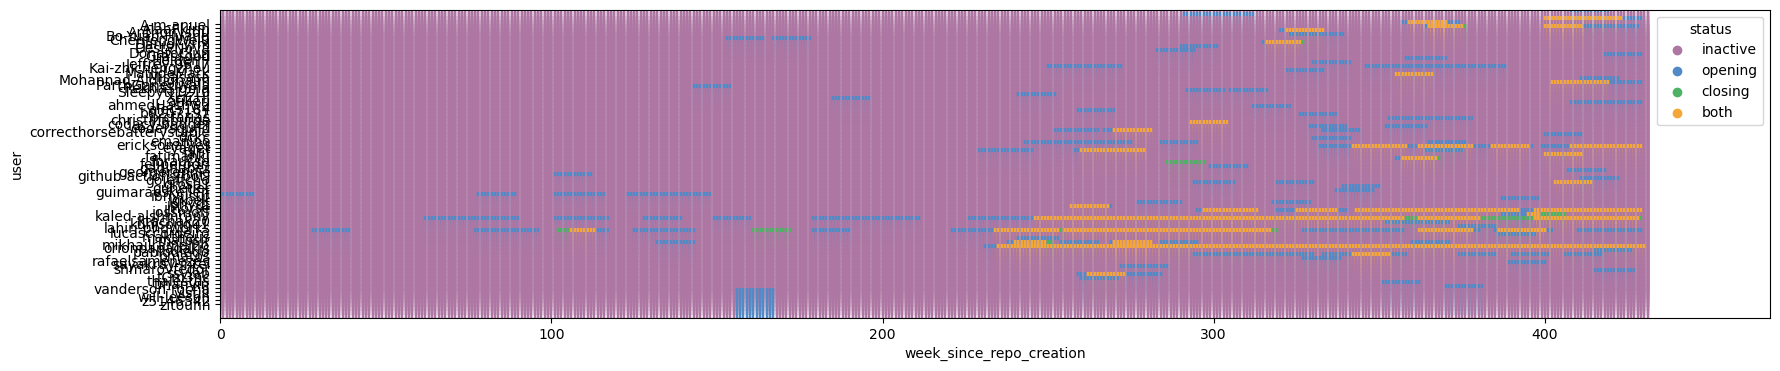

In [66]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.scatterplot(
    ax=ax,
    data=windowed_df,
    x="week_since_repo_creation",
    y="user",
    hue="status",
    hue_order=["inactive", "opening", "closing", "both"],
    palette=palette_short,
    marker="|",
    s=500,
    )
left, right = ax.get_xlim()
ax.set_xlim(left=0, right=right+10)
plt.show()

### Team size

In [67]:
contrib_df = pd.merge(metadata[["github_user_cleaned_url", "created_at"]], contributions)
contrib_df["week_since_repo_creation"] = (contrib_df.week_co - contrib_df.created_at).dt.days // 7

In [68]:
team_df = contrib_df[["author", "week_since_repo_creation", "commits"]].set_index(["author", "week_since_repo_creation"]).sort_index()

In [69]:
windowed_team_df = team_df.groupby(level="author").rolling(window=12, min_periods=0).sum().droplevel(0)

In [70]:
windowed_team_df["active contributor"] = windowed_team_df.commits > 0

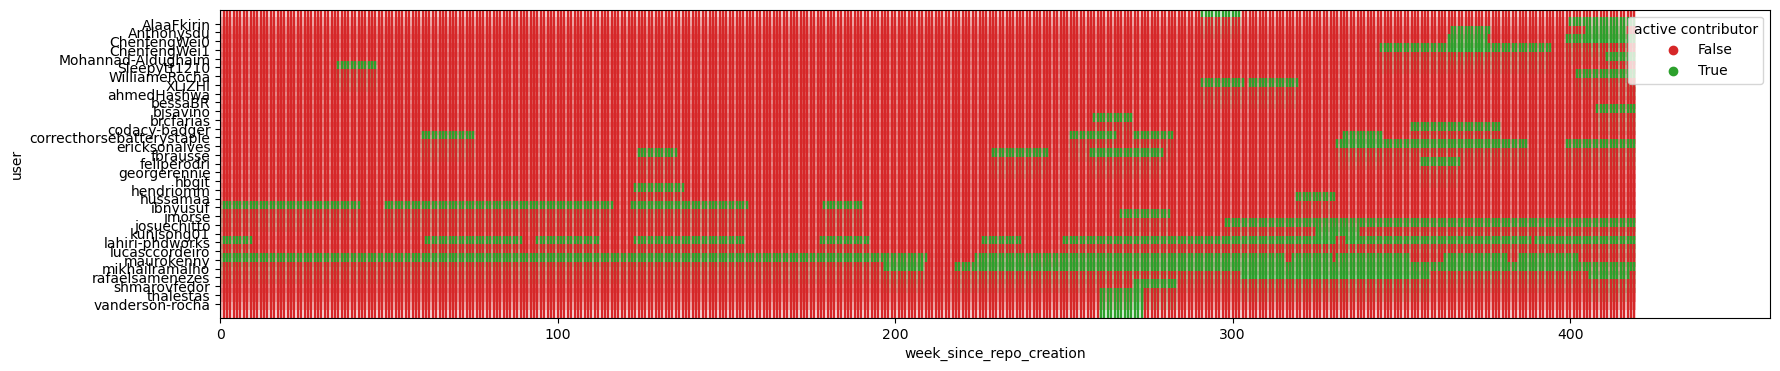

In [71]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.scatterplot(
    ax=ax,
    data=windowed_team_df,
    x="week_since_repo_creation",
    y="author",
    hue="active contributor",
    hue_order=[False, True],
    palette=['#d62728', '#2ca02c'],
    marker="|",
    s=500,
    )
left, right = ax.get_xlim()
ax.set_ylabel("user")
ax.set_xlim(left=0, right=right+10)
plt.show()

In [72]:
team_size = windowed_team_df.groupby(level="week_since_repo_creation")["active contributor"].value_counts()[:,True].reindex(windowed_team_df.index.levels[1], fill_value=0)

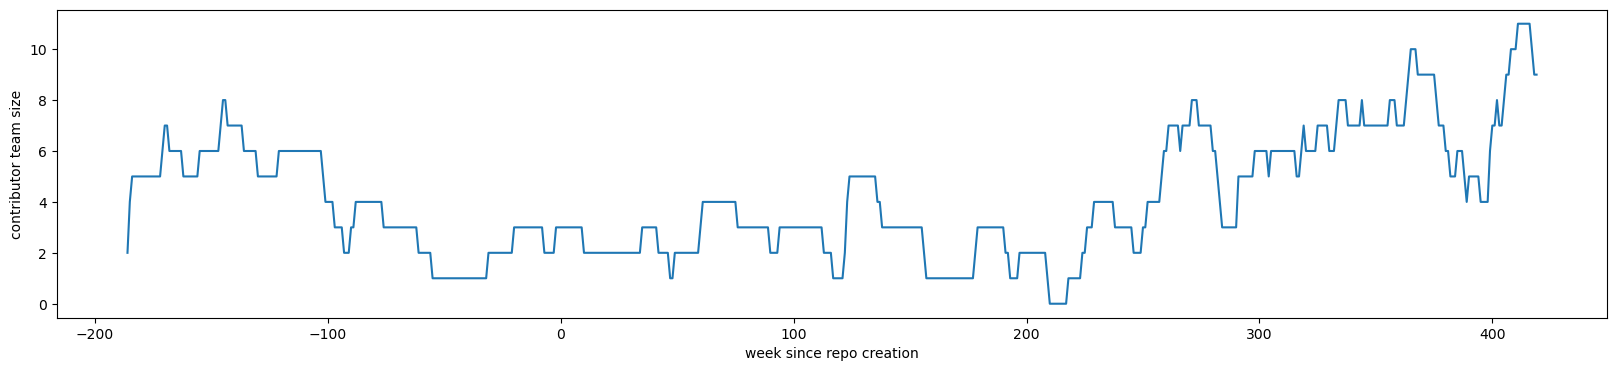

In [73]:
team_size.plot(
    figsize=(20, 4),
    xlabel="week since repo creation",
    ylabel="contributor team size",
)
plt.show()

In [74]:
became_active = team_df.groupby(level="author").cumsum()
became_active["contributor"] = became_active.commits > 0
became_active

commits  contributor
author          week_since_repo_creation                      
AlaaFkirin      -186                            0        False
                -185                            0        False
                -184                            0        False
                -183                            0        False
                -182                            0        False
...                                           ...          ...
vanderson-rocha  415                            2         True
                 416                            2         True
                 417                            2         True
                 418                            2         True
                 419                            2         True

[19998 rows x 2 columns]

In [75]:
team_growth = became_active.groupby(level="week_since_repo_creation")["contributor"].value_counts()[:,True].reindex(became_active.index.levels[1], fill_value=0)
#windowed_team_df["active contributor"] = windowed_team_df.commits > 0

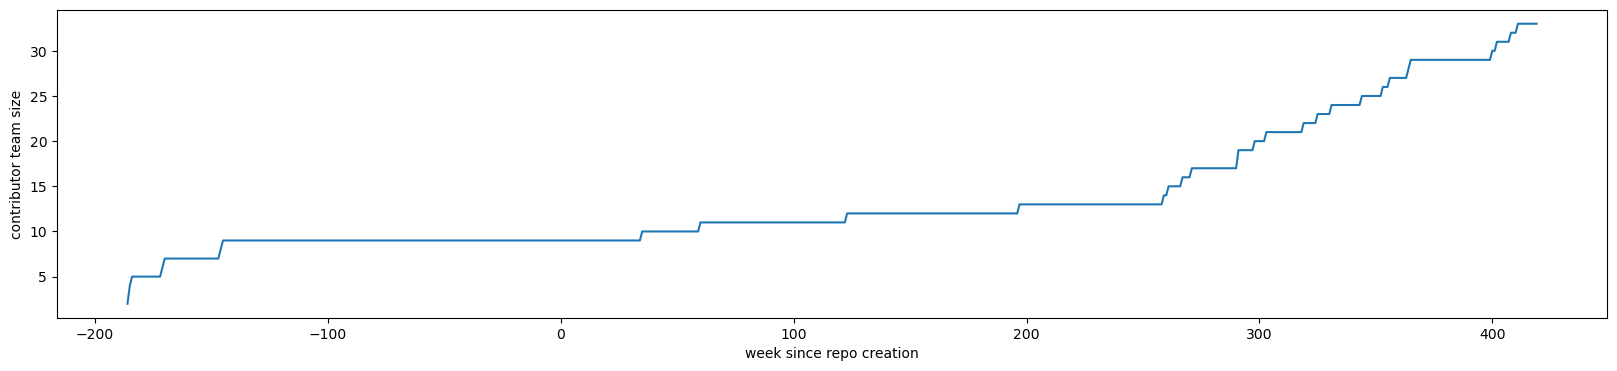

In [76]:
team_growth.plot(
    figsize=(20, 4),
    xlabel="week since repo creation",
    ylabel="contributor team size",
)
plt.show()

### Issues opened and closed

In [77]:
issues_timeline_df = pd.merge(metadata, issues, on="github_user_cleaned_url", suffixes=("_repo", None))

In [78]:
issues_timeline_df["opened_in_week_since_repo_creation"] = (issues_timeline_df.created_at - issues_timeline_df.created_at_repo).dt.days // 7
issues_timeline_df["closed_in_week_since_repo_creation"] = (issues_timeline_df.closed_at - issues_timeline_df.created_at_repo).dt.days // 7

In [79]:
issues_timeline_df

,github_user_cleaned_url,archived,created_at_repo,has_wiki,has_pages,state,created_at,user,closed_at,closed_by,opened_in_week_since_repo_creation,closed_in_week_since_repo_creation
0,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2023-07-03 12:07:44+00:00,rafaelsamenezes,NaT,NaN,419,NaN
1,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,closed,2023-07-01 10:29:29+00:00,brcfarias,2023-07-01 16:13:49+00:00,lucasccordeiro,418,418.0
2,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,closed,2023-06-30 13:47:10+00:00,rafaelsamenezes,2023-06-30 15:51:51+00:00,rafaelsamenezes,418,418.0
3,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,closed,2023-06-30 11:33:27+00:00,kunjsong01,2023-07-01 06:30:09+00:00,lucasccordeiro,418,418.0
4,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2023-06-30 11:21:02+00:00,kunjsong01,NaT,NaN,418,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2013-06-01 10:26:30+00:00,jmorse,NaT,github-actions[bot],-108,NaN
1125,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2013-05-28 13:19:34+00:00,jmorse,NaT,github-actions[bot],-108,NaN
1126,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2013-05-26 12:20:23+00:00,jmorse,NaT,github-actions[bot],-108,NaN
1127,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,open,2013-05-25 17:39:16+00:00,jmorse,NaT,github-actions[bot],-109,NaN


In [80]:
end = (datetime.now(tz=timezone.utc) - metadata.created_at.iloc[0]).days // 7
x_data = pd.Series(np.arange(end), name="week_since_repo_creation")

In [81]:
issue_count_timeline = pd.DataFrame(x_data)
issue_count_timeline["open_issues_count"] = issue_count_timeline.apply(lambda x: len(issues_timeline_df[
                                                                                        (issues_timeline_df.opened_in_week_since_repo_creation <= x.week_since_repo_creation) &
                                                                                        ((issues_timeline_df.closed_in_week_since_repo_creation >= x.week_since_repo_creation) |
                                                                                         (issues_timeline_df.closed_in_week_since_repo_creation.isna()))
                                                                                        ]), axis=1)
issue_count_timeline["closed_issues_count"] = issue_count_timeline.apply(lambda x: len(issues_timeline_df[
                                                                                        (issues_timeline_df.closed_in_week_since_repo_creation < x.week_since_repo_creation)
                                                                                        ]), axis=1)

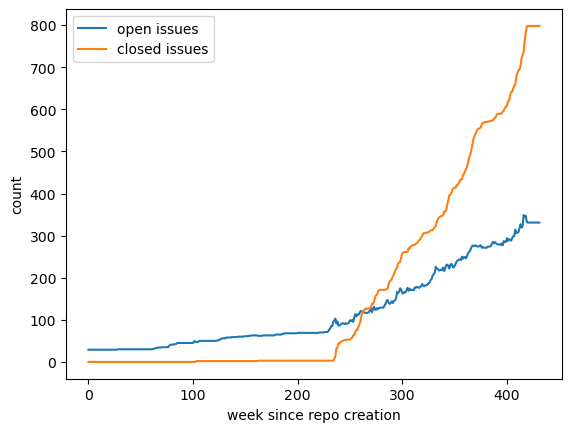

In [82]:
issue_count_timeline.rename(columns={"open_issues_count": "open issues", "closed_issues_count": "closed issues"}).plot(
    x="week_since_repo_creation",
    y=["open issues", "closed issues"],
    xlabel="week since repo creation",
    ylabel="count"
    )
plt.show()

In [83]:
open_issues_count_p = np.diff(issue_count_timeline['open_issues_count']) / np.diff(issue_count_timeline['week_since_repo_creation'])
week_since_repo_creation_p = (np.array(issue_count_timeline['week_since_repo_creation'])[:-1] + np.array(issue_count_timeline['week_since_repo_creation'])[1:]) / 2

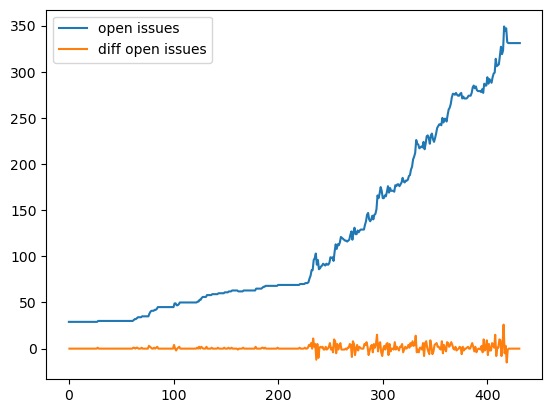

In [84]:

plt.plot(issue_count_timeline['week_since_repo_creation'], issue_count_timeline['open_issues_count'], label="open issues")
plt.plot(week_since_repo_creation_p, open_issues_count_p, label="diff open issues")
plt.legend()
plt.show()

### Engagement

In [85]:
forks_df = pd.merge(forks, metadata, on="github_user_cleaned_url")
forks_df["week_since_repo_creation"] = (forks_df.date - forks_df.created_at).dt.days // 7
forks_df = forks_df[["week_since_repo_creation", "user"]].groupby("week_since_repo_creation").count().rename(columns={"user": "no_forks"}).sort_index()

In [86]:
stars_df = pd.merge(stars, metadata, on="github_user_cleaned_url")
stars_df["week_since_repo_creation"] = (stars_df.date - stars_df.created_at).dt.days // 7
stars_df = stars_df[["week_since_repo_creation", "user"]].groupby("week_since_repo_creation").count().rename(columns={"user": "no_stars"}).sort_index()

In [87]:
end = (datetime.now(tz=timezone.utc) - metadata.created_at.iloc[0]).days // 7
x_data = pd.Series(np.arange(end), name="week_since_repo_creation")
engagement_df = pd.merge(x_data, forks_df, on="week_since_repo_creation", how="outer")
engagement_df = pd.merge(engagement_df, stars_df, on="week_since_repo_creation", how="outer").fillna(0)
engagement_df = engagement_df.set_index("week_since_repo_creation")

In [88]:
engagement_df = engagement_df.cumsum()

<Axes: xlabel='week_since_repo_creation'>

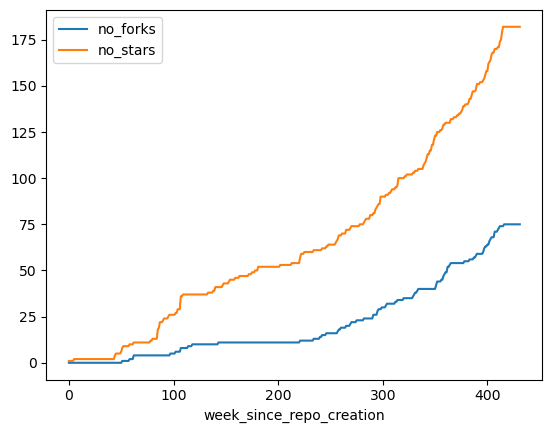

In [89]:
engagement_df.plot()

### Diffs

In [90]:
def get_diff_series(x, y):
    y_p = np.diff(y) / np.diff(x)
    x_p = (np.array(x)[:-1] + np.array(x)[1:]) / 2
    return (x_p, y_p)

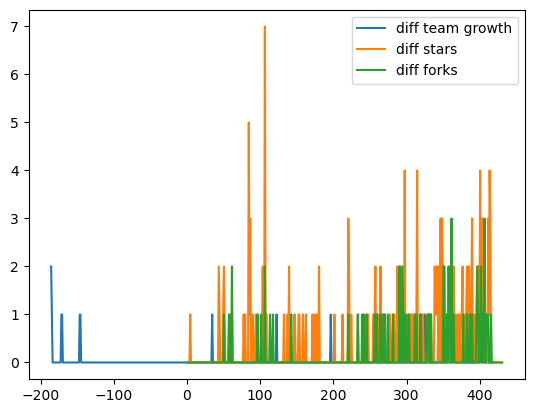

In [111]:
x_p, y_p = get_diff_series(team_growth.index, team_growth)
plt.plot(x_p, y_p, label="diff team growth")
x_p, y_p = get_diff_series(engagement_df.index, engagement_df["no_stars"])
plt.plot(x_p, y_p, label="diff stars")
x_p, y_p = get_diff_series(engagement_df.index, engagement_df["no_forks"])
plt.plot(x_p, y_p, label="diff forks")
plt.legend()
plt.show()

Useless if not fitting curve first.

### Highlights

In [93]:
import string
import re

def clean_heading(h):
    to_remove = string.digits + string.whitespace + ".:"
    h = h.lstrip(to_remove)
    pattern = "\[(.+?)\]\(.+?\)"  # markdown links
    h = re.sub(pattern, r'\1', h, count=0)
    h = h.replace(string.punctuation, "")
    h = h.strip(string.punctuation)
    h = h.lower()
    return h

In [94]:
import ast

headings = readme_history.added_headings.dropna().apply(ast.literal_eval).explode().dropna()

In [95]:
headings = headings.apply(clean_heading)

In [96]:
def analyse_headings(df):
    interesting_words = {
        "ownership": ["license", "example", "reference", "citation", "cited", "publication", "paper"],
        "usage": ["requirements", "using", "example", "usage", "run", "install", "installing", "installation", "tutorial", "tutorials", "build", "guide", "documentation"]
    }
    df["ownership_addition"] = df.added_headings.str.contains("|".join(interesting_words["ownership"]), case=False)
    df["usage_addition"] = df.added_headings.str.contains("|".join(interesting_words["usage"]), case=False)
    return df

In [97]:
df = pd.merge(metadata, readme_history, on="github_user_cleaned_url")
df.dropna(subset=["author_date"], inplace=True)
df["authored_in_week_since_creation"] = ((df.author_date - df.created_at).dt.days // 7)#.clip(0)
#df["authored_in_week_since_creation"].clip(0, inplace=True)

In [98]:
df

,github_user_cleaned_url,archived,created_at,has_wiki,has_pages,readme_path,author_date,added_headings,deleted_headings,added_cites,authored_in_week_since_creation
0,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2015-06-19 00:49:48+00:00,"['The ESBMC model checker', 'Features', 'Diffe...",[],[],-1
1,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2020-05-11 11:34:27+00:00,['Contributing to the code base'],[],[],255
2,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2021-11-26 09:24:51+00:00,['Acknowledgements'],[],[],335
3,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2021-11-26 10:01:57+00:00,['Acknowledgments'],['Acknowledgements'],[],335
4,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 07:45:57+00:00,['Publications'],[],[],341
5,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:22:00+00:00,[],[],"['* Mikhail Y. R. Gadelha, Felipe R. Monteiro,...",341
6,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:25:34+00:00,[],[],"['* Phillipe A. Pereira, Higo F. Albuquerque, ...",341
7,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:29:12+00:00,[],[],"['* Lucas C. Cordeiro, Bernd Fischer, João Mar...",341
8,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:34:30+00:00,[],[],"['* Lucas C. Cordeiro, Bernd Fischer. [Verifyi...",341
9,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:41:08+00:00,[],[],"['* Felipe R. Monteiro, Mikhail R. Gadelha, Lu...",341


In [99]:
df = analyse_headings(df)

In [100]:
df

,github_user_cleaned_url,archived,created_at,has_wiki,has_pages,readme_path,author_date,added_headings,deleted_headings,added_cites,authored_in_week_since_creation,ownership_addition,usage_addition
0,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2015-06-19 00:49:48+00:00,"['The ESBMC model checker', 'Features', 'Diffe...",[],[],-1,False,True
1,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2020-05-11 11:34:27+00:00,['Contributing to the code base'],[],[],255,False,False
2,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2021-11-26 09:24:51+00:00,['Acknowledgements'],[],[],335,False,False
3,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2021-11-26 10:01:57+00:00,['Acknowledgments'],['Acknowledgements'],[],335,False,False
4,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 07:45:57+00:00,['Publications'],[],[],341,True,False
5,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:22:00+00:00,[],[],"['* Mikhail Y. R. Gadelha, Felipe R. Monteiro,...",341,False,False
6,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:25:34+00:00,[],[],"['* Phillipe A. Pereira, Higo F. Albuquerque, ...",341,False,False
7,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:29:12+00:00,[],[],"['* Lucas C. Cordeiro, Bernd Fischer, João Mar...",341,False,False
8,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:34:30+00:00,[],[],"['* Lucas C. Cordeiro, Bernd Fischer. [Verifyi...",341,False,False
9,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,README.md,2022-01-06 08:41:08+00:00,[],[],"['* Felipe R. Monteiro, Mikhail R. Gadelha, Lu...",341,False,False


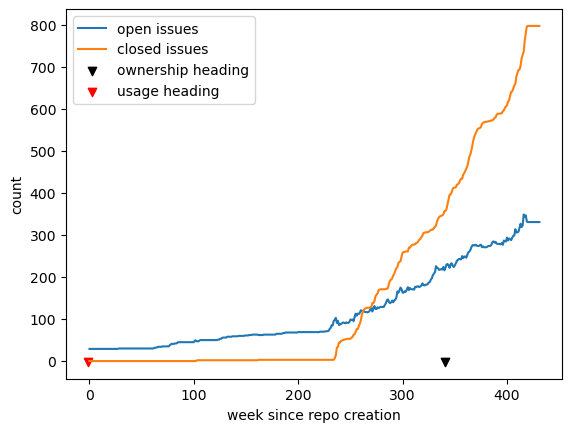

In [101]:
issue_count_timeline.rename(columns={"open_issues_count": "open issues", "closed_issues_count": "closed issues"}).plot(
    x="week_since_repo_creation",
    y=["open issues", "closed issues"],
    xlabel="week since repo creation",
    ylabel="count"
    )
ownership_added = df[df.ownership_addition].authored_in_week_since_creation
plt.scatter(ownership_added, (-2 * np.ones((len(ownership_added),))), marker="v", color="black", label="ownership heading")
usage_added = df[df.usage_addition].authored_in_week_since_creation
plt.scatter(usage_added, (-1 * np.ones((len(usage_added),))), marker="v", color="red", label="usage heading")
plt.legend()

In [102]:
contents.head()

,github_user_cleaned_url,license,readme_size,readme_path,readme_emojis,contributing_size,citation_added,contributing_added
36,esbmc/esbmc,other,13239,README.md,0,0,2022-12-06 14:46:10+00:00,NaT


In [103]:
def analyse_headings(df):
    interesting_words = {
        "ownership": ["license", "example", "reference", "citation", "cited", "publication", "paper"],
        "usage": ["requirements", "using", "example", "usage", "run", "install", "installing", "installation", "tutorial", "tutorials", "build", "guide", "documentation"]
    }
    df["ownership_addition"] = df.added_headings.str.contains("|".join(interesting_words["ownership"]), case=False)
    df["usage_addition"] = df.added_headings.str.contains("|".join(interesting_words["usage"]), case=False)
    return df

In [104]:
def date_highlights(readme_history, contents, metadata, ax):
    df = pd.merge(metadata, readme_history, on="github_user_cleaned_url")
    df.dropna(subset=["author_date"], inplace=True)
    df["authored_in_week_since_creation"] = (df.author_date - df.created_at).dt.days // 7
    contents_df = pd.merge(metadata, contents, on="github_user_cleaned_url")
    contents_df.citation_added = (contents_df.citation_added - contents_df.created_at).dt.days // 7
    contents_df.contributing_added = (contents_df.contributing_added - contents_df.created_at).dt.days // 7
    # headings
    df = analyse_headings(df)
    ownership_added = df[df.ownership_addition].authored_in_week_since_creation
    ax.scatter(ownership_added, (1 * np.ones((len(ownership_added),))), marker="v", s=100, label="ownership heading")
    usage_added = df[df.usage_addition].authored_in_week_since_creation
    ax.scatter(usage_added, (2 * np.ones((len(usage_added),))), marker="v", label="usage heading")
    # citation in README
    citation_added = df[(df.added_cites != "[]") & (df.added_cites.notna())]
    ax.scatter(citation_added, (3 * np.ones((len(citation_added),))), marker="v", label="citation in README")
    # citation file
    citation_file_added = contents_df[contents_df.citation_added.notna()]
    ax.scatter(citation_file_added, (4* np.ones((len(citation_file_added),))), marker="v", label="citation file")
    # contributing file
    contributing_file_added = contents_df[contents_df.contributing_added.notna()]
    ax.scatter(contributing_file_added, (5* np.ones((len(contributing_file_added),))), marker="v", label="contributing file")

TypeError: unhashable type: 'numpy.ndarray'

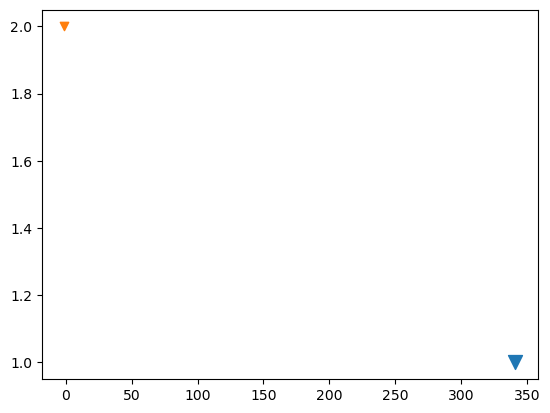

In [105]:
fig, ax = plt.subplots(1, 1)
date_highlights(readme_history, contents, metadata, ax)
plt.legend()
plt.show()

In [106]:
paper_data = pd.read_csv("../data/analysis/cleaned_links/joined.csv")
pd.merge(metadata, paper_data, on="github_user_cleaned_url")

,github_user_cleaned_url,archived,created_at,has_wiki,has_pages,title,author_for_reference,pdf_url,page_no,domain_url,pattern_cleaned_url,date,year,eprints_repo
0,esbmc/esbmc,False,2015-06-20 19:35:34+00:00,True,True,Using clang as a frontend on a formal verifica...,Mikhail R. Gadelha,https://eprints.soton.ac.uk/433284/1/Using_cla...,0,https://github.com/esbmc/esbmc,github.com/esbmc/esbmc,2017-02-01,2017.0,eprints.soton.ac.uk


### User fork/star highlight

In [107]:
users = np.unique(np.concatenate([issues.user.unique(), issues.closed_by.dropna().unique(), contributions.author.unique()]))

In [108]:
forks_users_df = forks[forks.user.isin(users)]

In [109]:
forks_users_df

,github_user_cleaned_url,date,user
36,esbmc/esbmc,2023-06-13 13:43:40+00:00,Mohannad-Aldughaim
36,esbmc/esbmc,2023-05-11 16:18:55+00:00,Anthonysdu
36,esbmc/esbmc,2023-04-09 22:29:54+00:00,grosa1
36,esbmc/esbmc,2023-03-13 07:28:55+00:00,Kai-zhichengzhou
36,esbmc/esbmc,2023-03-06 19:21:36+00:00,brcfarias
36,esbmc/esbmc,2023-03-06 16:58:47+00:00,XLiZHI
36,esbmc/esbmc,2023-02-25 07:22:01+00:00,eyaget
36,esbmc/esbmc,2022-12-13 12:00:21+00:00,rafaelsamenezes
36,esbmc/esbmc,2022-12-06 13:48:19+00:00,tCm3nc
36,esbmc/esbmc,2022-09-21 08:52:23+00:00,z5146542


In [110]:
stars_users_df = stars[stars.user.isin(users)]
stars_users_df

,github_user_cleaned_url,date,user
36,esbmc/esbmc,2015-06-22 12:30:00+00:00,mikhailramalho
36,esbmc/esbmc,2016-04-27 16:45:53+00:00,hussamaa
36,esbmc/esbmc,2016-05-03 12:45:48+00:00,ericksonalves
36,esbmc/esbmc,2016-06-09 21:01:09+00:00,jmorse
36,esbmc/esbmc,2016-09-01 14:32:12+00:00,hbgit
36,esbmc/esbmc,2017-04-29 17:00:58+00:00,pmatos
36,esbmc/esbmc,2018-06-01 18:39:01+00:00,DonatoClun
36,esbmc/esbmc,2019-09-17 13:21:55+00:00,feliperodri
36,esbmc/esbmc,2020-02-10 18:43:27+00:00,alecs184
36,esbmc/esbmc,2020-05-30 18:55:38+00:00,kaled-alshmrany


## test aggregated datasets

In [87]:
repo_id = "rOpenHealth/ClinicalCodes"

In [88]:
dfs = {}
dfs["overall_timeline_df"] = pd.read_csv("../data/analysis/aggregated_timeline.csv")
dfs["commit_author_df"] = pd.read_csv("../data/analysis/aggregated_commit_author_timeline.csv")
dfs["issue_user_df"] = pd.read_csv("../data/analysis/aggregated_issue_user_timeline.csv")
dfs["overall_df"] = pd.read_csv("../data/analysis/aggregated_overall.csv")
for k, v in dfs.items():
    dfs[k] = v[v.github_user_cleaned_url == repo_id]

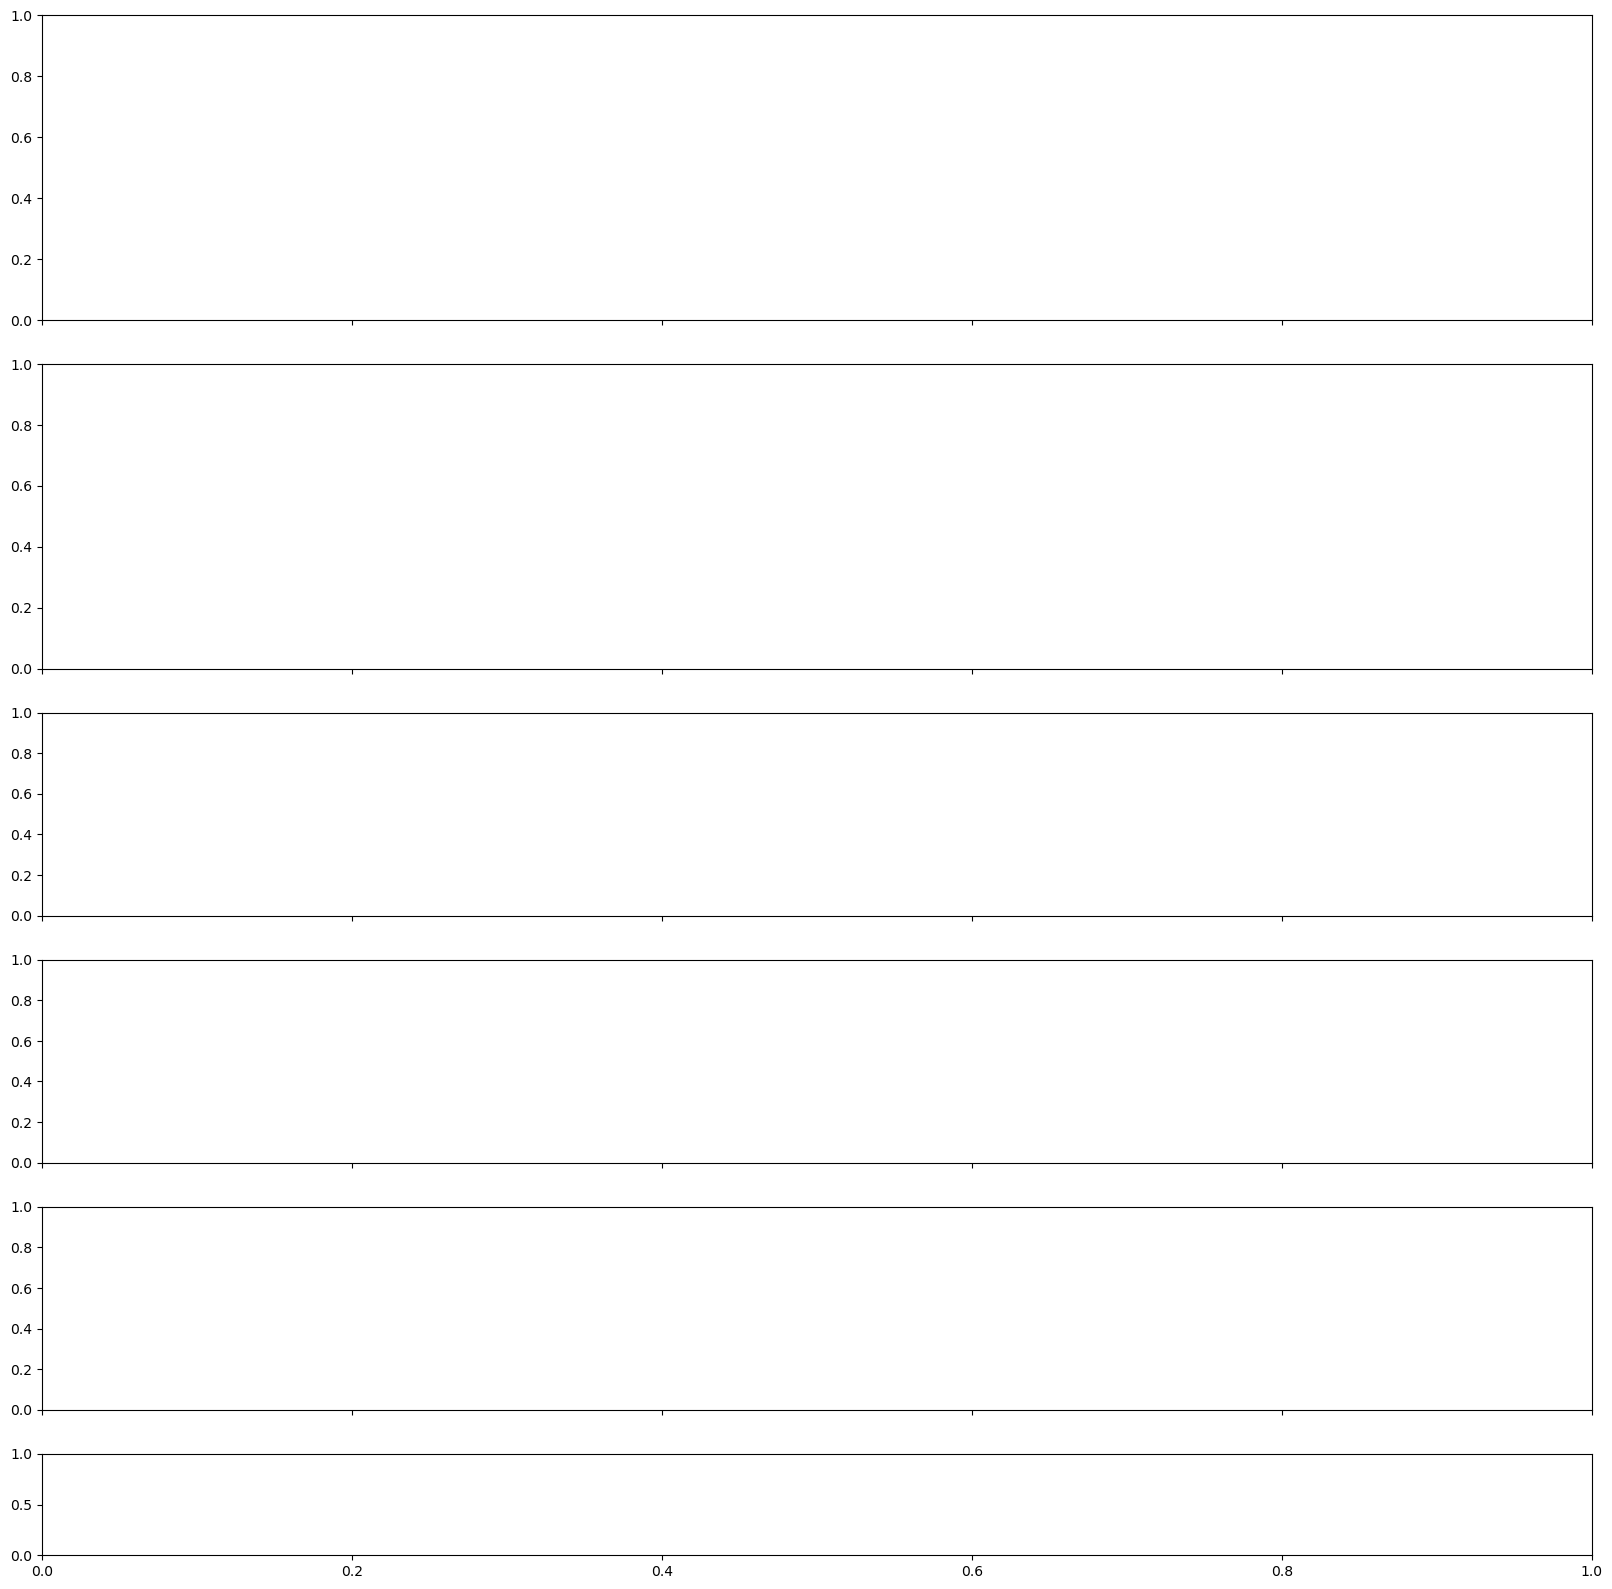

In [89]:
# prepare figure
fig = plt.figure(figsize=(20, 20))
overlay_axis = fig.subplots()
overlay_axis.axis('off')
axs = fig.subplots(nrows=6, sharex=True, height_ratios=[3, 3, 2, 2, 2, 1])
for ax in axs:
    ax.patch.set_alpha(0)

In [90]:
# user_type_wrt_issues
sns.scatterplot(
    ax=axs[0],
    data=dfs["issue_user_df"],
    x="week_since_repo_creation",
    y="user",
    hue="user_status",
    hue_order=["inactive", "opening", "closing", "both"],
    palette=['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c'],
    marker="|",
    s=500,
    )
axs[0].set_ylabel("issue user")
axs[0].legend(loc="upper right")
axs[0].grid(True, axis="x")

In [91]:
# contributor_team
dfs["commit_author_df"]["active_contributors"] = dfs["commit_author_df"]["active_contributors"].map({True: "active", False: "inactive"})
# plot per-user status
sns.scatterplot(
    ax=axs[1],
    data=dfs["commit_author_df"],
    x="week_since_repo_creation",
    y="author",
    hue="active_contributors",
    hue_order=["inactive", "active"],
    palette=['#d62728', '#2ca02c'],
    marker="|",
    s=500,
)
axs[1].set_ylabel("contributing user")
dfs["overall_timeline_df"].plot(
    ax=axs[2],
    lw=2,
    x="week_since_repo_creation",
    y=["active_contributors", "contributors"],
    ylabel="number of contributors"
)
axs[1].grid(True, axis="x")
axs[1].legend()
axs[2].legend(loc="upper right")
axs[2].grid(True)

In [92]:
# no_open_and_closed_issues
dfs["overall_timeline_df"].plot(
    ax=axs[3],
    x="week_since_repo_creation",
    y=["open_count", "closed_count"],
    ylabel="issues"
)
axs[3].legend(loc="upper right")
axs[3].grid(True)

In [93]:
# engagement
dfs["overall_timeline_df"].plot(
    ax=axs[4],
    x="week_since_repo_creation",
    y=["forks_count", "stars_count"],
    ylabel="issues"
)
axs[4].legend(loc="upper right")
axs[4].grid(True)

In [94]:
# helper function for highlights
def calc_y_timeline(data):
    ys = [[] for _ in range(len(data))]
    seen_x = []
    for i in range(len(data)):
        for x in data[i]:
            ys[i].append(-1 * seen_x.count(x))
            seen_x.append(x)
    return ys

In [95]:
# date_highlights
ax=axs[5]
ax.set(ylim=(-6, 0.4), yticks=[])
ax.set_xlabel("weeks since repository creation", loc="right")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
events_df = dfs["overall_timeline_df"]
data = [events_df[events_df.ownership_added].week_since_repo_creation,
        events_df[events_df.usage_added].week_since_repo_creation, 
        events_df[events_df.citation_added].week_since_repo_creation, 
        events_df[events_df.citation_file_added].week_since_repo_creation, 
        events_df[events_df.contributing_file_added].week_since_repo_creation, 
        events_df[events_df.paper_published].week_since_repo_creation]
ys = calc_y_timeline(data)
labels = ["ownership heading", "usage heading", "citation in README", "citation file", "contributing file", "mention in publication"]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ymax = 86
for i in range(len(data)):
    ax.scatter(data[i], ys[i], marker="^", s=100, label=labels[i], color=colors[i])
    overlay_axis.vlines(data[i], ys[i], ymax, linestyles='dashed', color=colors[i])
axs[5].legend(loc="upper right", ncols=2)

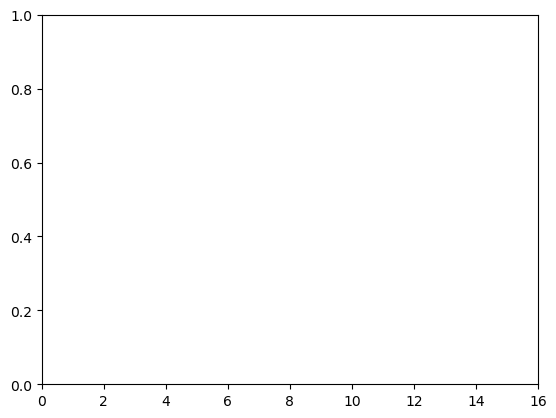

In [96]:
# final adjustments
ymax = 86
xl, xr = plt.xlim()
plt.xlim(xl, xr+15)
overlay_axis.set(xlim=(xl, xr+15), ylim=(-6, ymax))
fig.suptitle(repo_id)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

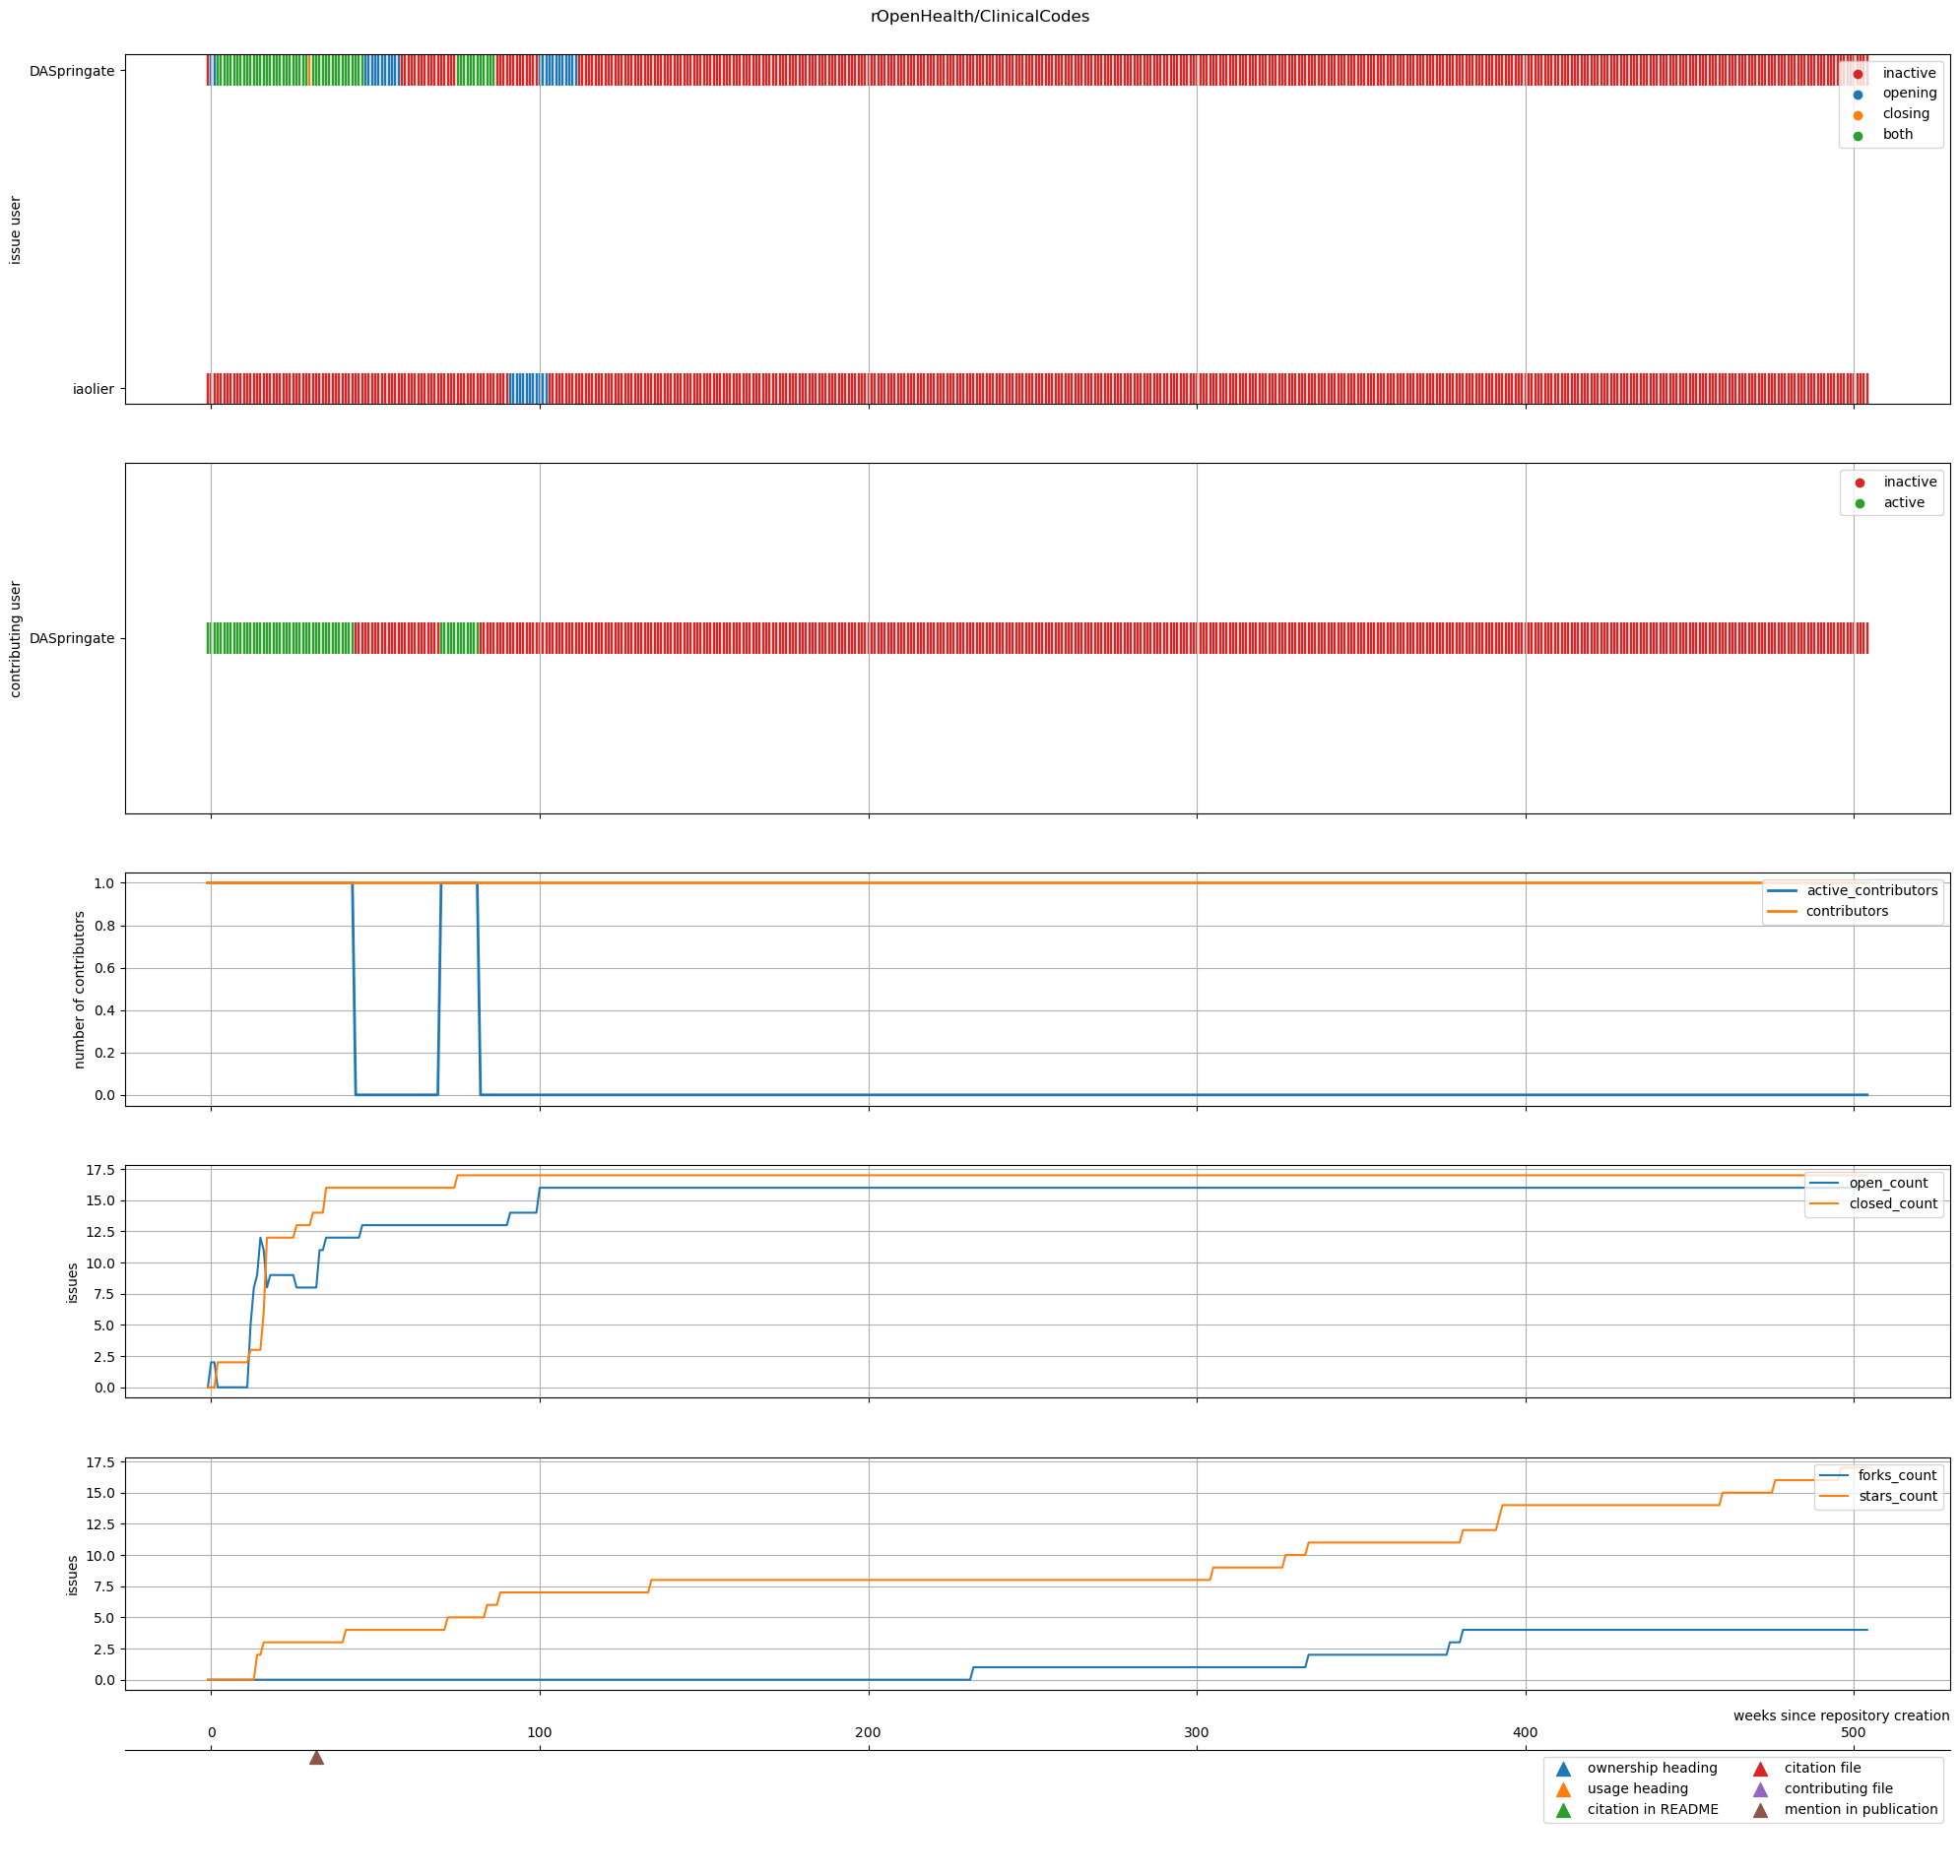

In [97]:
fig